<h1 align="left"  style=" color:#000; background-color:#FFB6C1; padding:10px;">Cardiovascular Disease Classification </h1>

**Group No: 4**

**Group Members**: 

**Parvaz Virk - 0269556**

**Arjun Thakur -0271741**

**Rohit Mahendran - 0274440**

**Radhika Jayakrishnan- 0269994**

**Dilini Harshani Kumari - 0274072**

**Jaya Subha Shanmugaraja - 0269829**


<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section I: Problem Statement  </h1>

**Objective: Predicting a person can get cardiovascular disease based on the patient data**

We are trying to find the factors affecting Cardiovascular disease & predicting if a patient can have Cardiovascular disease or not based on those attributes. We are dealing with a classification problem here. It is a binary classification. Where '1' means the patient has high chances of Cardiovascular disease and'0' means patient has got low chances of Cardiovascular disease.

**Questions we are looking to answer through this project:**

To Identify the key influential factors for cardiovascular disease risk.

To Determine impactful features, guiding actionable insights for healthcare based on predictions.

To Explore if there are demographic variations in cardiovascular disease risks, such as gender and age.

To Develop profiles of individuals at higher risk, aiding in personalized healthcare strategies.

## Steps Involved

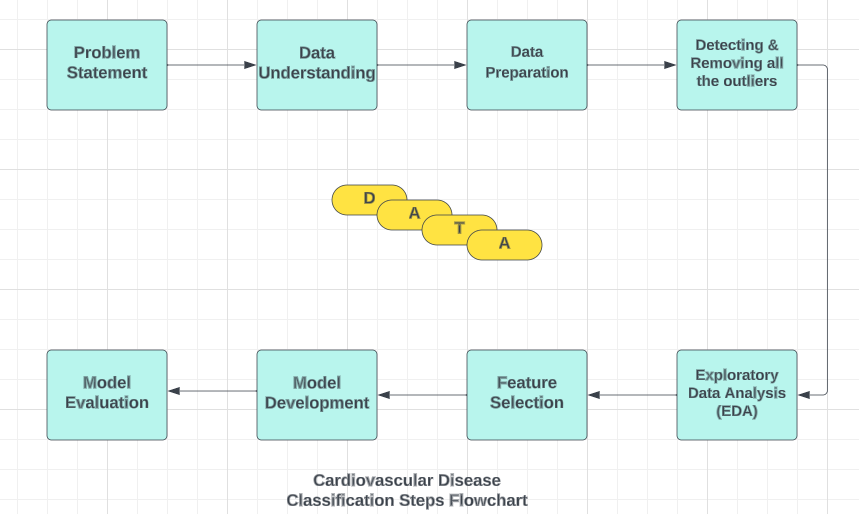

In [1]:
from IPython.display import Image
Image(filename='Cardiovascular Disease Classification Flowchart.png')

<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section II: Data Understanding

## Loading the csv file dataset into the program
**In this dataset, we have 1 input file (6.9 Mb)**

We downloaded the CSV format dataset from the Kaggle website : 

1. **Cardiovascular_Disease_dataset.csv:** Contains the lookup table with 70,000 records for patients that includes a total of 13 features. To gauge the factors affecting Cardiovascular Disease, thirteen variables were taken under consideration; these include id, age, gender, height, weight, systolic blood pressure (ap_hi), diastolic blood pressure (ap_lo), cholesterol level, glucose level, smoker/non-smoker , alcohol intake, physical activity and presence/ absence of cardiovascular disease. Age was measured in days, height was measured in centimeters and weight was measured in kilograms. Three levels were considered for measuring cholesterol and glucose- 1 for normal, 2 for above normal, and  3 for well above normal. Since the variables smoking, alcohol intake, physical activity and presence/ absence of Cardiovascular Disease are subjective features, they could either take the value of 1 (implying true) or 0 (implying false), thus they were measured in binary.

**Kaggle Dataset Link :** https://www.kaggle.com/code/sulianova/eda-cardiovascular-data/notebook?scriptVersionId=9722310

## Metadata
<ol>
    <li><strong>id</strong>: Unique identifier for each individual in the dataset. It facilitates tracking and referencing specific data points.</li>
    <li><strong>age</strong>: Age of individuals in days, providing a granular level of detail for age-related analyses.</li>
    <li><strong>gender</strong>: Indicates the gender of individuals. Values 1 and 2 represent male and female, respectively.</li>
    <li><strong>height</strong>: Height of individuals in centimeters, providing a quantitative measure of their vertical stature.</li>
    <li><strong>weight</strong>: Weight of individuals in kilograms, serving as a quantitative measure of their mass.</li>
    <li><strong>ap_hi</strong>: Systolic blood pressure, representing the pressure in the arteries during the contraction of the heart muscle.</li>
    <li><strong>ap_lo</strong>: Diastolic blood pressure, representing the pressure in the arteries when the heart is at rest between beats.</li>
    <li><strong>cholesterol</strong>: Categorizes individuals into three levels: 1 for normal, 2 for above normal, and 3 for well above normal cholesterol levels.</li>
    <li><strong>gluc</strong>: Categorizes individuals into three levels: 1 for normal, 2 for above normal, and 3 for well above normal glucose levels.</li>
    <li><strong>smoke</strong>: Binary variable indicating whether an individual is a smoker (1) or a non-smoker (0).</li>
    <li><strong>alco</strong>: Binary variable indicating whether an individual consumes alcohol (1) or not (0).</li>
    <li><strong>active</strong>: Binary variable indicating whether an individual is physically active (1) or not (0).</li>
    <li><strong>cardio</strong>: Binary variable representing the presence of cardiovascular disease in individuals. It serves as the target variable for binary classification.</li>
</ol>


## Importing all the necessary libraries

In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import os
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.patches as mpatches
import matplotlib as mpl
import scipy
from datetime import datetime as dt
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler
from statistics import median, mode
from scipy.stats import kurtosis
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, auc
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.utils import resample

In [65]:
#Importing the csv dataset file
data_raw = pd.read_csv(r'C:\Users\arjun\OneDrive\Desktop\2023 Sept Fall 3rd sem\Data Mining\project\Cardiovascular_Disease_dataset.csv')
data_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [66]:
data_raw.shape # 7000- rows and 13 columns

(70000, 13)

In [67]:
# Showing the first 4 sample of cardiovascular disease dataframe
data_raw.head(4)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1


In [68]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


In [69]:
data_raw.dtypes

id             int64
age            int64
gender         int64
height         int64
weight         int64
ap_hi          int64
ap_lo          int64
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
cardio         int64
dtype: object

<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section III: Data Preparation (Preprocessing, Cleaning and Feature Engineering)

## Removing Irrelevant & Unwanted Redundant Features

In [70]:
data_raw.drop("id",axis=1,inplace=True) #drops the 'id' column

## Renaming the attribute names

In [71]:
new_column_names = {
    'age': 'AGE',
    'gender': 'GENDER',
    'height': 'HEIGHT',
    'weight': 'WEIGHT',
    'ap_hi': 'SYSTOLIC_BP',
    'ap_lo': 'DIASTOLIC_BP',
    'cholesterol': 'CHOLESTEROL_LEVEL',
    'gluc': 'GLUCOSE_LEVEL',
    'smoke': 'SMOKER',
    'alco': 'ALCOHOL_CONSUMER',
    'active': 'PHYSICAL_ACTIVITY',
    'cardio': 'CARDIOVASCULAR_DISEASE'
}

data_raw.rename(columns=new_column_names, inplace=True)

In [72]:
# Convert age from days to years
data_raw['AGE'] = data_raw['AGE'] / 365.25  

# Convert 'AGE' column to integer
data_raw['AGE'] = data_raw['AGE'].astype(int)

## Dropping duplicate cases in dataset

In [73]:
print("There is {} duplicated values in data frame".format(data_raw.duplicated().sum()))

There is 3191 duplicated values in data frame


In [74]:
duplicated = data_raw[data_raw.duplicated(keep=False)] # first,last,false
duplicated = duplicated.sort_values(by=['AGE', "GENDER", "HEIGHT"], ascending= False) 

duplicated.head(4)

,AGE,GENDER,HEIGHT,WEIGHT,SYSTOLIC_BP,DIASTOLIC_BP,CHOLESTEROL_LEVEL,GLUCOSE_LEVEL,SMOKER,ALCOHOL_CONSUMER,PHYSICAL_ACTIVITY,CARDIOVASCULAR_DISEASE
12334,64,2,175,70,110,70,1,1,0,0,1,0
15717,64,2,175,80,120,80,1,1,0,0,1,1
33407,64,2,175,80,120,80,1,1,0,0,1,1
52311,64,2,175,70,110,70,1,1,0,0,1,0


In [75]:
# removes duplicate rows, keeping only the first occurrence of each unique row based on all columns.
data_raw.drop_duplicates(inplace=True) 
print("There is {} duplicated values in data frame".format(data_raw.duplicated().sum()))

There is 0 duplicated values in data frame


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : Initially we had 3191 duplicate rows, after dropping them we were left with 0 duplicate rows. This step is a part of data cleaning. </h1>

In [76]:
# Printing the shape of the csv file data
data_raw.shape

(66809, 12)

In [77]:
data_raw.describe()

,AGE,GENDER,HEIGHT,WEIGHT,SYSTOLIC_BP,DIASTOLIC_BP,CHOLESTEROL_LEVEL,GLUCOSE_LEVEL,SMOKER,ALCOHOL_CONSUMER,PHYSICAL_ACTIVITY,CARDIOVASCULAR_DISEASE
count,66809.000000,66809.000000,66809.000000,66809.000000,66809.000000,66809.000000,66809.000000,66809.000000,66809.000000,66809.000000,66809.000000,66809.000000
mean,52.825967,1.356269,164.343547,74.522834,129.227649,97.441931,1.382583,1.236106,0.092113,0.056280,0.798575,0.512042
std,6.798560,0.478900,8.333431,14.579614,157.630588,192.882088,0.690064,0.582080,0.289188,0.230463,0.401068,0.499859
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
columns_with_negative_values = data_raw.columns[data_raw.lt(0).any()]

negative_value_counts = data_raw[columns_with_negative_values].lt(0).sum()

# Displaying the columns with negative values
print("Columns with negative values:", columns_with_negative_values.tolist())

# Displaying the count of negative values for each column
print("Count of negative values for each column:")
print(negative_value_counts)


Columns with negative values: ['SYSTOLIC_BP', 'DIASTOLIC_BP']
Count of negative values for each column:
SYSTOLIC_BP     7
DIASTOLIC_BP    1
dtype: int64


In [79]:
# We dropped all the rows with negative values for 'SYSTOLIC_BP' and 'DIASTOLIC_BP attributes
negative_rows_filter = (data_raw['SYSTOLIC_BP'] < 0) | (data_raw['DIASTOLIC_BP'] < 0)
data_raw.drop(data_raw[negative_rows_filter].index, inplace=True)

data_raw.shape


(66801, 12)

<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : It was observed that there were 8 rows in the dataset that had unexpected negative values. These values were present in "SYSLOTIC_BP' and 'DIASTOLIC_BP'. We successfully dropped them. </h1>

## Feature Engineering

In [80]:
# We replaced missing values with 0
data_raw.fillna(0, inplace=True)

In [81]:
data_raw.isnull().sum() # checking the result to make sure there are no missing values anymore

AGE                       0
GENDER                    0
HEIGHT                    0
WEIGHT                    0
SYSTOLIC_BP               0
DIASTOLIC_BP              0
CHOLESTEROL_LEVEL         0
GLUCOSE_LEVEL             0
SMOKER                    0
ALCOHOL_CONSUMER          0
PHYSICAL_ACTIVITY         0
CARDIOVASCULAR_DISEASE    0
dtype: int64

## Balancing Target Variable

In [82]:
# Identifying the class with fewer samples
minority_class = data_raw['CARDIOVASCULAR_DISEASE'].value_counts().idxmin()

# Separating majority and minority classes
majority_class = data_raw[data_raw['CARDIOVASCULAR_DISEASE'] != minority_class]
minority_class = data_raw[data_raw['CARDIOVASCULAR_DISEASE'] == minority_class]

# Next we undersampled the majority class to match the size of the minority class
undersampled_majority = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Concatenation of the undersampled majority class with the minority class
balanced_data = pd.concat([undersampled_majority, minority_class])
balanced_data = balanced_data.sample(frac=1, random_state=42)

# Verifying the balanced class distribution
class_counts = balanced_data['CARDIOVASCULAR_DISEASE'].value_counts()
print("Balanced Class Distribution:")
print(class_counts)


Balanced Class Distribution:
CARDIOVASCULAR_DISEASE
0    32596
1    32596
Name: count, dtype: int64


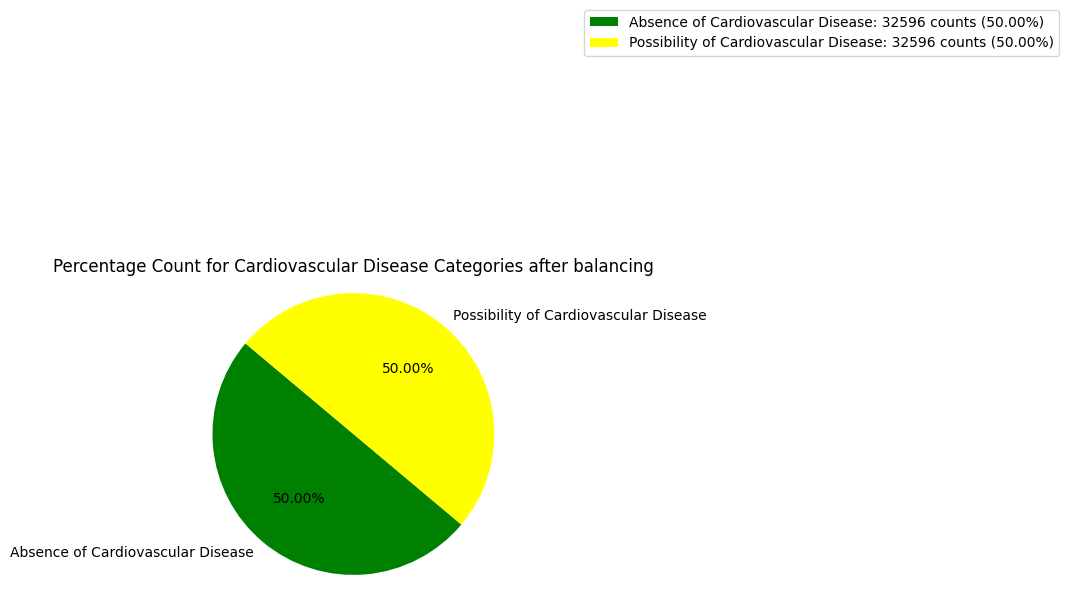

In [83]:
class_names = [
    "Absence of Cardiovascular Disease",
    "Possibility of Cardiovascular Disease",
]

counts = [32596, 32596]
percentages = [50, 50]

negative_color = '#008000'  # Green
positive_color = '#FFFF00'  # Yellow

# Creating a pie chart for viz
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=class_names, autopct='%1.2f%%', startangle=140, colors=[negative_color, positive_color])

# Adding a custom legend
legend_labels = [f'{label}: {count} counts ({percentage:.2f}%)' for label, count, percentage in zip(class_names, counts, percentages)]
plt.legend(legend_labels, loc="upper right", bbox_to_anchor=(2.8, 1.9))

# Adding a title to our viz
plt.title('Percentage Count for Cardiovascular Disease Categories after balancing')

# Displaying the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : We balanced the target variable to a equal number of instances for both the class, promoting a balanced representation in our binary classification . We realised balancing the'CARDIOVASCULAR_DISEASE' attribute was crucial in optimizing the model, ensuring accurate predictions while prioritizing the significance of the desired outcome.</h1>

<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section IV : Detecting & Removing Outliers

In [84]:
data_raw.describe() # We used describe() function in Pandas to get summary statistics of the numeric columns in the DataFrame

,AGE,GENDER,HEIGHT,WEIGHT,SYSTOLIC_BP,DIASTOLIC_BP,CHOLESTEROL_LEVEL,GLUCOSE_LEVEL,SMOKER,ALCOHOL_CONSUMER,PHYSICAL_ACTIVITY,CARDIOVASCULAR_DISEASE
count,66801.000000,66801.000000,66801.000000,66801.000000,66801.000000,66801.000000,66801.000000,66801.000000,66801.000000,66801.000000,66801.000000,66801.000000
mean,52.825991,1.356252,164.343707,74.523705,129.255550,97.446415,1.382599,1.236134,0.092124,0.056287,0.798581,0.512043
std,6.798112,0.478895,8.333752,14.579585,157.618539,192.892442,0.690087,0.582109,0.289204,0.230476,0.401063,0.499859
min,29.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
data_raw.shape

(66801, 12)

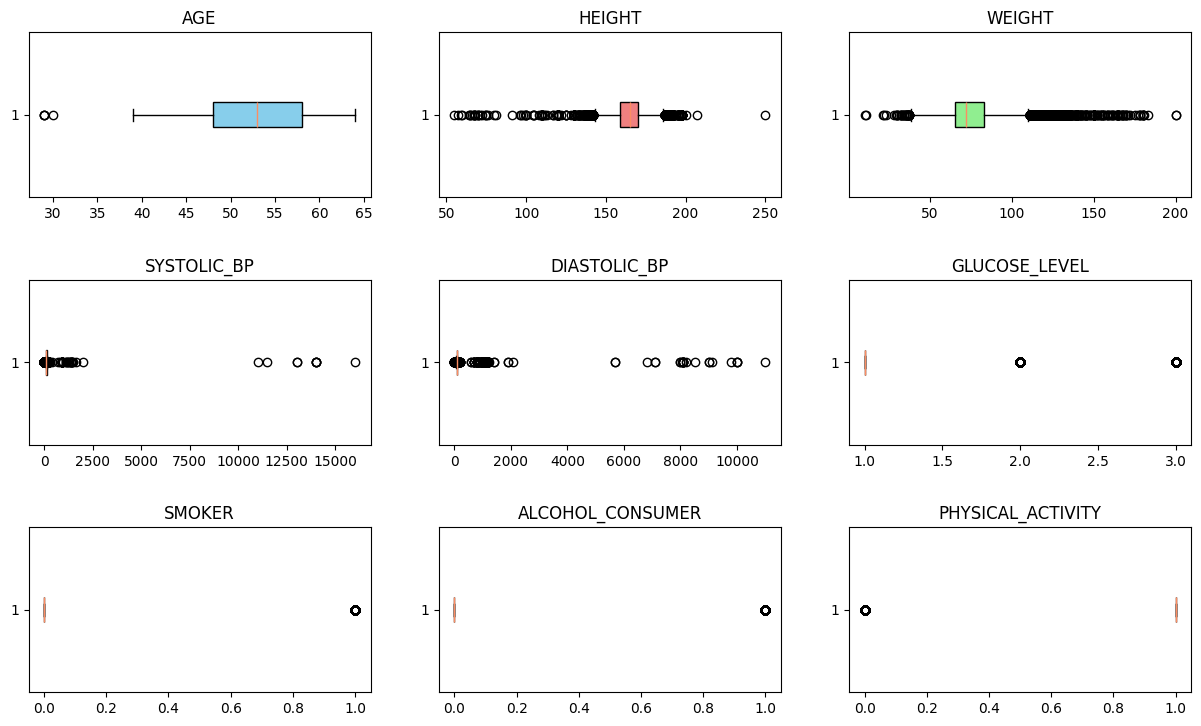

In [86]:
columns_for_box_plots = [
    'AGE', 'HEIGHT', 'WEIGHT', 'SYSTOLIC_BP', 'DIASTOLIC_BP', 'GLUCOSE_LEVEL', 'SMOKER', 'ALCOHOL_CONSUMER', 'PHYSICAL_ACTIVITY'
]


fig, axs = plt.subplots(5, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)


boxplot_colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightcyan', 
                  'lightpink', 'lightyellow', 'lightgrey', 'lightblue']

for i, (column, color) in enumerate(zip(columns_for_box_plots, boxplot_colors)):
    row = i // 3
    col = i % 3

    box = axs[row, col].boxplot(data_raw[column], vert=False, patch_artist=True)
    for patch in box['boxes']:
        patch.set_facecolor(color)
    
    axs[row, col].set_title(column)


for i in range(len(columns_for_box_plots), 15):
    row = i // 3
    col = i % 3
    fig.delaxes(axs[row, col])

plt.show()


In [87]:
def find_columns_with_outliers(df, iqr_multiplier=1.5):
    columns_with_outliers = []
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR
            column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            if not column_outliers.empty:
                columns_with_outliers.append(column)
    return columns_with_outliers

# Finding the columns with outliers
columns_with_outliers = find_columns_with_outliers(data_raw)
print("Columns with outliers:", columns_with_outliers)

# Counting the number of outliers for each variable
outlier_counts = {}

for column in columns_with_outliers:
    # Calculate the IQR for the column
    Q1 = data_raw[column].quantile(0.25)
    Q3 = data_raw[column].quantile(0.75)
    IQR = Q3 - Q1

    # Defining the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Counting the number of outliers
    num_outliers = len(data_raw[(data_raw[column] < lower_bound) | (data_raw[column] > upper_bound)])

    outlier_counts[column] = num_outliers

print("Number of outliers in each variable:")
print(outlier_counts)


Columns with outliers: ['AGE', 'HEIGHT', 'WEIGHT', 'SYSTOLIC_BP', 'DIASTOLIC_BP', 'GLUCOSE_LEVEL', 'SMOKER', 'ALCOHOL_CONSUMER', 'PHYSICAL_ACTIVITY']
Number of outliers in each variable:
{'AGE': 4, 'HEIGHT': 519, 'WEIGHT': 1282, 'SYSTOLIC_BP': 1427, 'DIASTOLIC_BP': 4615, 'GLUCOSE_LEVEL': 10481, 'SMOKER': 6154, 'ALCOHOL_CONSUMER': 3760, 'PHYSICAL_ACTIVITY': 13455}


In [88]:
for column in columns_with_outliers:
    min_value = data_raw[column].min()
    max_value = data_raw[column].max()
    print(f"{columns_with_outliers.index(column) + 1}. {column}: Min = {min_value}, Max = {max_value}")

1. AGE: Min = 29, Max = 64
2. HEIGHT: Min = 55, Max = 250
3. WEIGHT: Min = 10, Max = 200
4. SYSTOLIC_BP: Min = 1, Max = 16020
5. DIASTOLIC_BP: Min = 0, Max = 11000
6. GLUCOSE_LEVEL: Min = 1, Max = 3
7. SMOKER: Min = 0, Max = 1
8. ALCOHOL_CONSUMER: Min = 0, Max = 1
9. PHYSICAL_ACTIVITY: Min = 0, Max = 1


In [89]:
unique_age = sorted(data_raw['AGE'].unique())
print("Unique values for AGE:", unique_age)

unique_weight = sorted(data_raw['WEIGHT'].unique())
print("Unique values for WEIGHT:", unique_weight)

unique_glucose_level = sorted(data_raw['GLUCOSE_LEVEL'].unique())
print("Unique values for GLUCOSE_LEVEL:", unique_glucose_level)

unique_smoker = sorted(data_raw['SMOKER'].unique())
print("Unique values for SMOKER:", unique_smoker)

unique_alcohol_consumer = sorted(data_raw['ALCOHOL_CONSUMER'].unique())
print("Unique values for ALCOHOL_CONSUMER:", unique_alcohol_consumer)

unique_physical_activity = sorted(data_raw['PHYSICAL_ACTIVITY'].unique())
print("Unique values for PHYSICAL_ACTIVITY:", unique_physical_activity)


Unique values for AGE: [29, 30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
Unique values for WEIGHT: [10, 11, 21, 22, 23, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 175, 177, 178, 180, 181, 183, 200]
Unique values for GLUCOSE_LEVEL: [1, 2, 3]
Unique values for SMOKER: [0, 1]
Unique values for ALCOHOL_CONSUMER: [0, 1]
Unique values for PH

In [90]:
# Filtering the rows to keep only 'WEIGHT' between 40 kgs and 180 kgs
data_raw.drop(data_raw[(data_raw['WEIGHT'] < 40) | (data_raw['WEIGHT'] > 180)].index, inplace=True)

In [91]:
# Filtering rows to keep only 'AGE' between 40 yrs and 65 yrs
data_raw.drop(data_raw[(data_raw['AGE'] < 40) | (data_raw['AGE'] > 65)].index, inplace=True)

In [92]:
data_raw.drop(data_raw[(data_raw['HEIGHT'] < 140) | (data_raw['HEIGHT'] > 200)].index, inplace=True)

In [93]:
data_raw.shape

(64800, 12)

In [94]:
x = data_raw.copy(deep=True)

In [95]:
s_list = ["SYSTOLIC_BP", "DIASTOLIC_BP"]
def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std() #standard-score
    return x_std 
x_std=standartization(x)

In [96]:
x_melted = pd.melt(frame=x_std, id_vars="CARDIOVASCULAR_DISEASE", value_vars=s_list, var_name="features", value_name="value", col_level=None)
x_melted

,CARDIOVASCULAR_DISEASE,features,value
0,0,SYSTOLIC_BP,-0.122187
1,1,SYSTOLIC_BP,0.065351
2,1,SYSTOLIC_BP,0.002839
3,1,SYSTOLIC_BP,0.127864
4,0,SYSTOLIC_BP,-0.184700
...,...,...,...
129595,1,DIASTOLIC_BP,-0.091800
129596,1,DIASTOLIC_BP,-0.039823
129597,1,DIASTOLIC_BP,-0.039823
129598,1,DIASTOLIC_BP,-0.091800


([0, 1], [Text(0, 0, 'SYSTOLIC_BP'), Text(1, 0, 'DIASTOLIC_BP')])

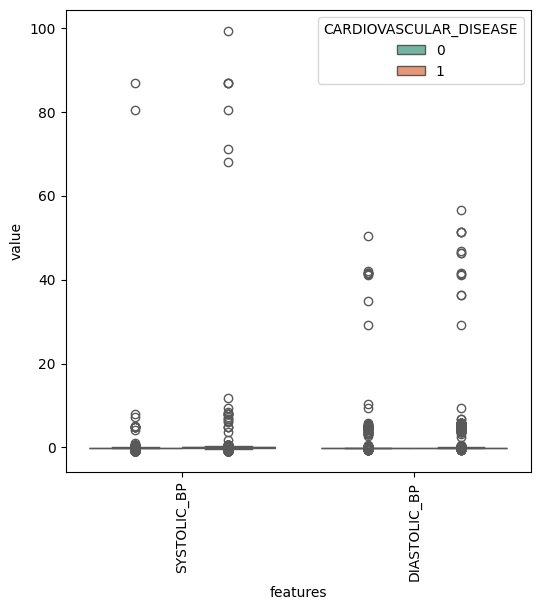

In [97]:
plt.figure(figsize=(6,6))
sns.boxplot(x="features", y="value", hue="CARDIOVASCULAR_DISEASE", data=x_melted)
plt.xticks(rotation=90) 

<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : There are some outliers in the dataset, but as seen above there is an unusual outlier in ap_hi and ap_lo features.
Let us calculate the low bound and hi bound of ap_lo and ap_hi features </h1>

In [98]:
ap_list = ["SYSTOLIC_BP", "DIASTOLIC_BP"]
boundary = pd.DataFrame(index=["lower_bound","upper_bound"]) 
for each in ap_list:
    Q1 = x[each].quantile(0.25) 
    Q3 = x[each].quantile(0.75) 
    IQR = Q3 - Q1 

    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound ]
boundary

,SYSTOLIC_BP,DIASTOLIC_BP
lower_bound,90.0,65.0
upper_bound,170.0,105.0


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : We can select the index of outlier data by using boundaries we calculated. Normally we should analyze both upper outliers and below outliers but in this case, we consider to handle just uppers because of their extremely higher values. </h1>

In [99]:
systolic_bp_filter = (x["SYSTOLIC_BP"] > boundary["SYSTOLIC_BP"][1]) #1st condition for upper bound
diastolic_bp_filter = (x["DIASTOLIC_BP"] > boundary["DIASTOLIC_BP"][1]) #2nd condition for upper bound                                                       
outlier_filter = (systolic_bp_filter | diastolic_bp_filter) #if any one condition fails, it's and OUTLIER! (upper bound)
x_outliers = x[outlier_filter]
x_outliers["CARDIOVASCULAR_DISEASE"].value_counts()

C:\Users\arjun\AppData\Local\Temp\ipykernel_1928\3721008096.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  systolic_bp_filter = (x["SYSTOLIC_BP"] > boundary["SYSTOLIC_BP"][1]) #1st condition for upper bound
C:\Users\arjun\AppData\Local\Temp\ipykernel_1928\3721008096.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diastolic_bp_filter = (x["DIASTOLIC_BP"] > boundary["DIASTOLIC_BP"][1]) #2nd condition for upper bound


CARDIOVASCULAR_DISEASE
1    1987
0     378
Name: count, dtype: int64

<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : "If one’s systolic pressure (SYSTOLIC_BP) exceeds 180 or diastolic pressure (DIASTOLIC_BP) crosses 120, it is a stage that requires immediate medical attention."

A study published by doctors in NCBI NLM recorded a maximum blood pressure of 370/360 mm Hg. This study was performed by recording blood pressure in 10 male athletes through radial artery catheterization.
Thus we can drop the SYSTOLIC_BP outlier values over 250 and DIASTOLIC_BP outlier values over 200, without fear of missing data.

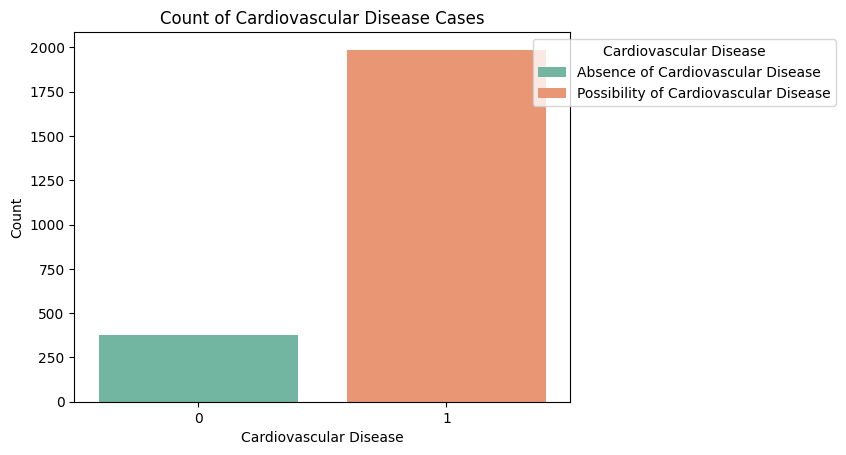

In [100]:
# Setting the color palette
sns.set_palette("Set2")

# Creating a countplot with different colors for each class
sns.countplot(x='CARDIOVASCULAR_DISEASE', data=x_outliers, linewidth=2, hue='CARDIOVASCULAR_DISEASE')

# Adding labels and title to our bar chart
plt.xlabel("Cardiovascular Disease")
plt.ylabel("Count")
plt.title("Count of Cardiovascular Disease Cases")

# Adding a legend on upper right
plt.legend(title='Cardiovascular Disease', loc='upper right', labels=['Absence of Cardiovascular Disease', 'Possibility of Cardiovascular Disease'],
           bbox_to_anchor=(1.55, 1))

# Showing the plot
plt.show()


In [101]:
out_filter = ((x["SYSTOLIC_BP"]>250) | (x["DIASTOLIC_BP"]>200) ) #creating filter for drop the illogical outliers
print("There is {} outlier".format(x[out_filter]["CARDIOVASCULAR_DISEASE"].count()))

There is 972 outlier


In [102]:
data_raw.shape

(64800, 12)

In [103]:
x = x[~out_filter]#passing all True values and neglecting all False(which are outliers), 972 false values rows removed

In [104]:
data_raw = data_raw[~out_filter]#passing all True values and neglecting all False(which are outliers), 972 false values rows removed

In [105]:
x.shape

(63828, 12)

<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation: After performing all the methods to identify and fix the outliers we removed total of 2973 rows from our dataset. We did this to enhance the data reliability by eliminating extreme values that may distort statistical analyses, leading to more robust and accurate model training. This improves the model's generalization ensuring a more representative understanding of the underlying data patterns. </h1>

<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section V: Exploratory Data Analysis

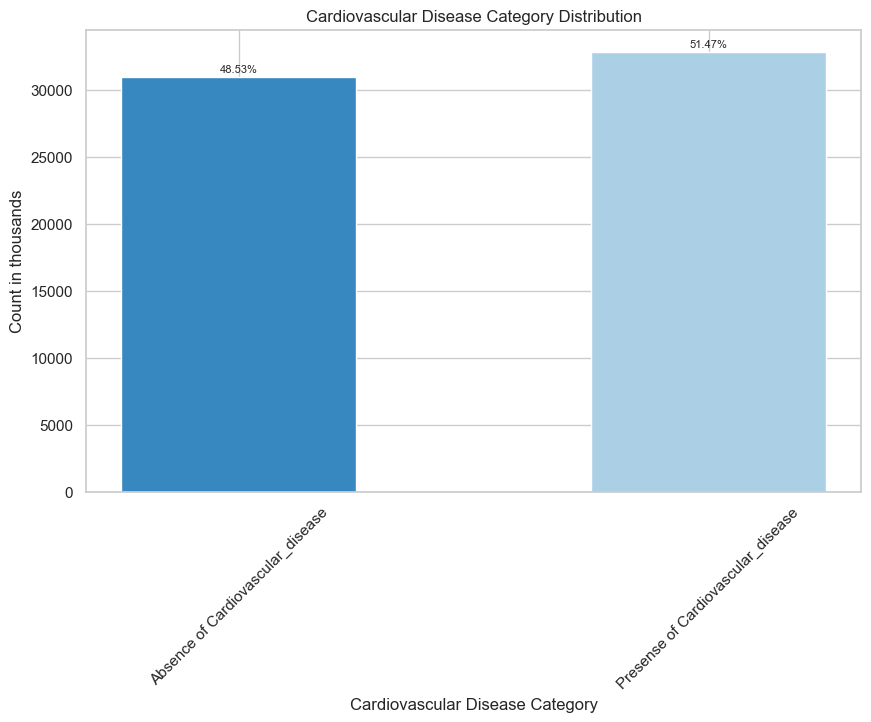

In [43]:
class_labels = {
    0: 'Absence of Cardiovascular_disease',
    1: 'Presense of Cardiovascular_disease',
}


class_counts = data_raw['CARDIOVASCULAR_DISEASE'].value_counts()
sorted_class_counts = class_counts.loc[class_labels.keys()]


colors = sns.color_palette("Blues_r", n_colors=len(class_labels))
legend_labels = [f'{label}: {count} counts ({count/len(data_raw)*100:.2f}%)' for label, count in zip(class_labels.values(), sorted_class_counts)]

# Creating the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.5
bars = plt.bar(class_labels.values(), sorted_class_counts, color=colors, width=bar_width)
plt.xlabel('Cardiovascular Disease Category')
plt.ylabel('Count in thousands')
plt.title('Cardiovascular Disease Category Distribution')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height/len(data_raw)*100:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', fontsize=8)

plt.xticks(rotation=45)
plt.show()


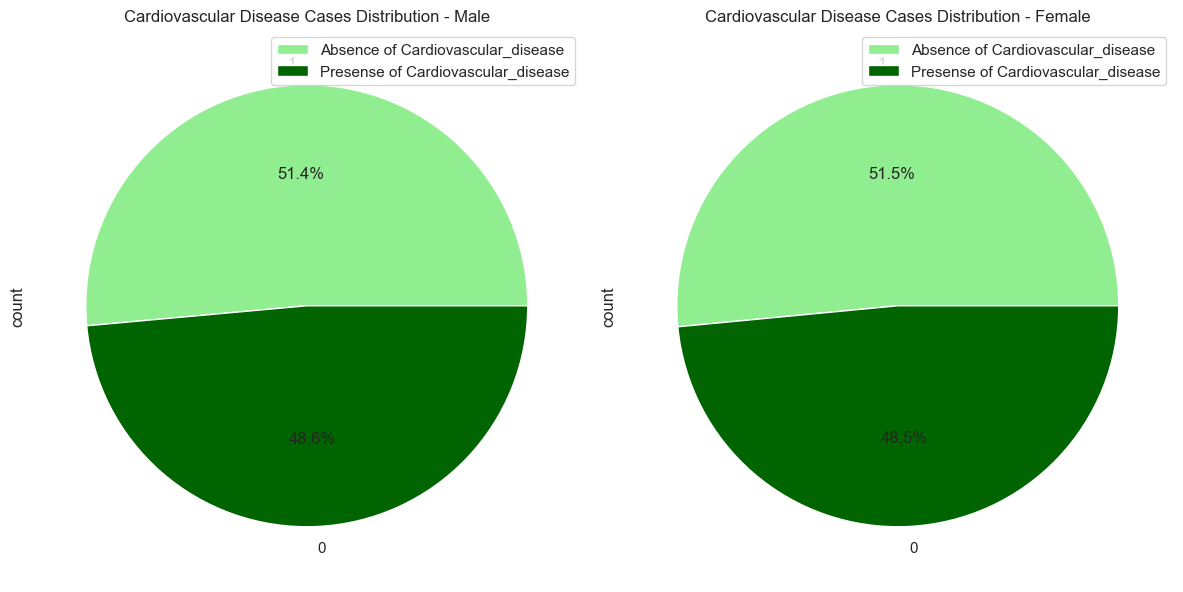

In [108]:
class_labels = {
    0: 'Absence of Cardiovascular_disease',
    1: 'Presense of Cardiovascular_disease',
}

# Setting the style of seaborn
sns.set(style="whitegrid")

# Defining colors for each class
colors = ['lightgreen', 'darkgreen']


# Creating two subplots, one for Male and the other for female
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting for MALE
male_data = data_raw[data_raw['GENDER'] == 1]
male_data['CARDIOVASCULAR_DISEASE'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', colors=colors)
axes[0].set_title('Cardiovascular Disease Cases Distribution - Male')
axes[0].legend(labels=[class_labels[0], class_labels[1]], loc='upper right')

# Plotting for FEMALE
female_data = data_raw[data_raw['GENDER'] == 2]
female_data['CARDIOVASCULAR_DISEASE'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', colors=colors)
axes[1].set_title('Cardiovascular Disease Cases Distribution - Female')
axes[1].legend(labels=[class_labels[0], class_labels[1]], loc='upper right')

# Adjusting the layout
plt.tight_layout()

# Showing the plot
plt.show()


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation: From the two preceding pie charts, it can be noticed that gender does not particularly impact the probability of a cardiovascular disease. </h1>

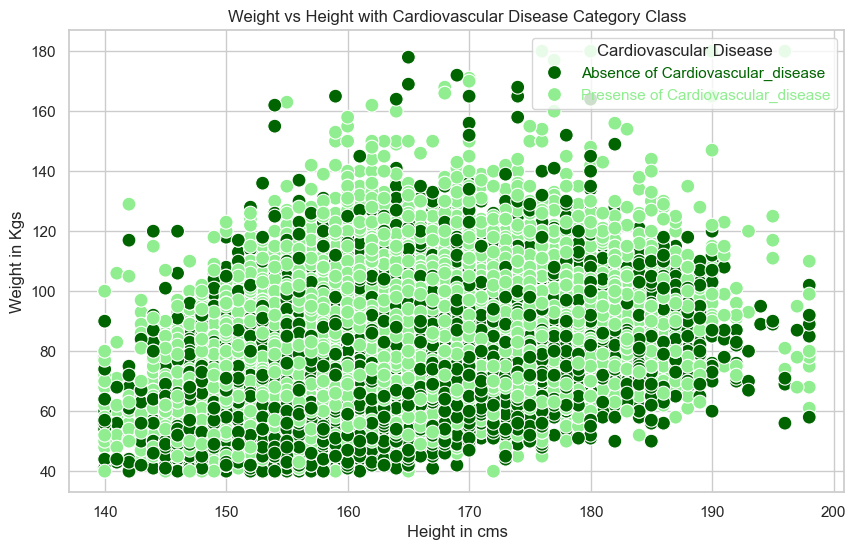

In [44]:
# Setting the style of seaborn
sns.set(style="whitegrid")

# Creating a scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    x='HEIGHT', 
    y='WEIGHT', 
    hue='CARDIOVASCULAR_DISEASE', 
    data=data_raw, 
    palette={0: 'darkgreen', 1: 'lightgreen'}, 
    s=100
)

plt.title('Weight vs Height with Cardiovascular Disease Category Class')
plt.xlabel('Height in cms')
plt.ylabel('Weight in Kgs')

# Customizing the legend
legend_labels = [class_labels[label] for label in sorted(data_raw['CARDIOVASCULAR_DISEASE'].unique())]
legend = scatter_plot.legend(title='Cardiovascular Disease', loc='upper right')
for label, color in zip(legend.get_texts(), ['darkgreen', 'lightgreen']):
    label.set_text(class_labels[int(label.get_text())])
    label.set_color(color)

# Showing the plot
plt.show()


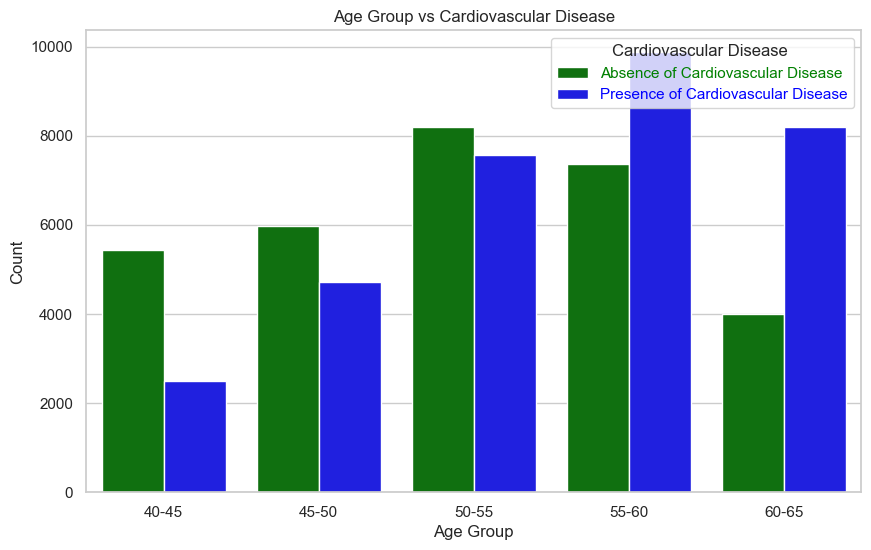

In [106]:
# Age vs Cardiovascular Disease
bins = [40, 45, 50, 55, 60, 65]
labels = ['40-45', '45-50', '50-55', '55-60', '60-65']
data_raw['AGE_GROUP'] = pd.cut(data_raw['AGE'], bins=bins, labels=labels, right=False)

# Setting the style of seaborn
sns.set(style="whitegrid")

# Grouping the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='AGE_GROUP', hue='CARDIOVASCULAR_DISEASE', data=data_raw, palette={0: '#008000', 1: '#0000FF'})

plt.title('Age Group vs Cardiovascular Disease')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Customizing the legend
legend_labels = ['Absence of Cardiovascular Disease', 'Presence of Cardiovascular Disease']
legend = plt.legend(title='Cardiovascular Disease ', labels=legend_labels, loc='upper right')

# Next we customize legend text and colors
for i, label in enumerate(legend_labels):
    legend.get_texts()[i].set_text(label)
    legend.get_texts()[i].set_color({0: '#008000', 1: '#0000FF'}[i])

# Showing the plot
plt.show()

In [107]:
data_raw.drop('AGE_GROUP', axis=1, inplace=True) # it is a derived column, we don't need it anymore

<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : After studying the above bar chart we can say that the patients in the age groups of 55 to 60 and 60 to 65 face a higher risk of
cardiovascular disease. That means the risk of cardio disease increases with the age .  </h1>

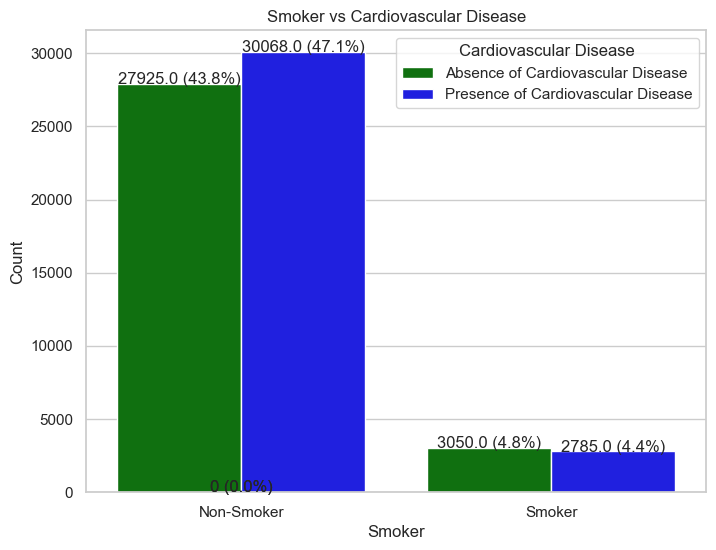

In [113]:
# Smoker vs Cardiovascular Disease
sns.set(style="whitegrid")   # Setting the style of seaborn

# Replace 0 and 1 with 'Non-Smoker' and 'Smoker' in the 'SMOKER' column
data_raw['SMOKER'] = data_raw['SMOKER'].map({0: 'Non-Smoker', 1: 'Smoker'})

# Countplotting for Smoker vs Cardiovascular Disease
plt.figure(figsize=(8, 6))
sns.countplot(x='SMOKER', hue='CARDIOVASCULAR_DISEASE', data=data_raw, palette={0: '#008000', 1: '#0000FF'})

plt.title('Smoker vs Cardiovascular Disease')
plt.xlabel('Smoker')
plt.ylabel('Count')

# Customizing the legend
legend_labels = ['Absence of Cardiovascular Disease', 'Presence of Cardiovascular Disease']
legend = plt.legend(title='Cardiovascular Disease', labels=legend_labels, loc='upper right')

# Showing the count and percentage on top of each bar
total_count = len(data_raw)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height} ({height/total_count:.1%})', ha='center')

# Showing the plot
plt.show()


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation :  Based on this dataset, we observed that the presence of cardiovascular disease is more likely in Non-Smoker class.. </h1>

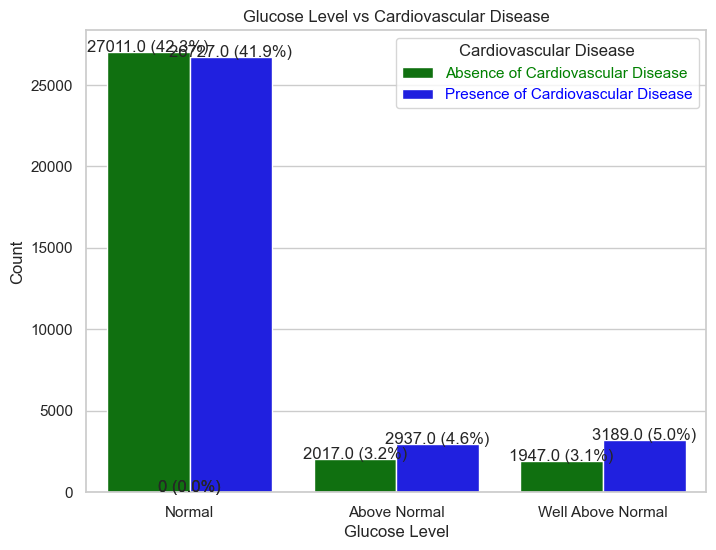

In [114]:
# Glucose vs Cardiovascular Disease
sns.set(style="whitegrid")  # Setting the style of seaborn

# Replacing 1,2,3 in the 'GLUCOSE_LEVEL' columm with Normal, Above Normal, and Well Above Normal
data_raw.loc[:, 'GLUCOSE_LEVEL'] = data_raw['GLUCOSE_LEVEL'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})

                                                                 
# Countplotting for Smoker vs Cardiovascular Disease
plt.figure(figsize=(8, 6))
sns.countplot(x='GLUCOSE_LEVEL', hue='CARDIOVASCULAR_DISEASE', data=data_raw, palette={0: '#008000', 1: '#0000FF'})

plt.title('Glucose Level vs Cardiovascular Disease')
plt.xlabel('Glucose Level')
plt.ylabel('Count')

# Customizing the legend
legend_labels = ['Absence of Cardiovascular Disease', 'Presence of Cardiovascular Disease']
legend = plt.legend(title='Cardiovascular Disease', labels=legend_labels, loc='upper right')

# Customizing legend text and colors
for i, label in enumerate(legend_labels):
    legend.get_texts()[i].set_text(label)
    legend.get_texts()[i].set_color({0: '#008000', 1: '#0000FF'}[i])

# Showing the count and percentage on top of each bar
total_count = len(data_raw)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height} ({height/total_count:.1%})', ha='center')

# Showing the plot
plt.show()


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation :  From the above bar chart plot, we can say that patients with normal glucose levels had less probability of facing cardiovascular
disease  </h1>

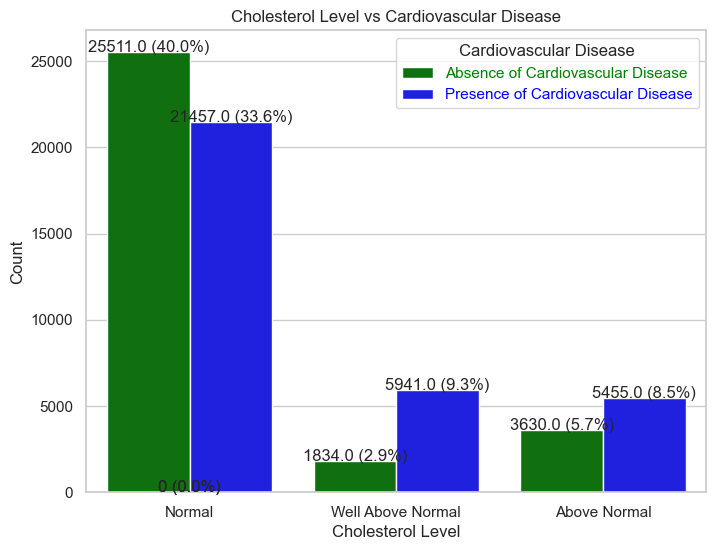

In [45]:
# Cholesterol level vs Cardiovascular Disease
sns.set(style="whitegrid")  # Setting the style of seaborn

# Replacing 1,2,3 in the 'CHOLESTEROL_LEVEL' column with Normal, Above Normal, and Well Above Normal
data_raw.loc[:, 'CHOLESTEROL_LEVEL'] = data_raw['CHOLESTEROL_LEVEL'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})

                                                                 
# Countplotting for CHOLESTEROL_LEVEL vs Cardiovascular Disease
plt.figure(figsize=(8, 6))
sns.countplot(x='CHOLESTEROL_LEVEL', hue='CARDIOVASCULAR_DISEASE', data=data_raw, palette={0: '#008000', 1: '#0000FF'})

plt.title('Cholesterol Level vs Cardiovascular Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')

# Customizing the legend
legend_labels = ['Absence of Cardiovascular Disease', 'Presence of Cardiovascular Disease']
legend = plt.legend(title='Cardiovascular Disease', labels=legend_labels, loc='upper right')

# Customizing the legend text and colors
for i, label in enumerate(legend_labels):
    legend.get_texts()[i].set_text(label)
    legend.get_texts()[i].set_color({0: '#008000', 1: '#0000FF'}[i])

# Showing the count and percentage on top of each bar
total_count = len(data_raw)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height} ({height/total_count:.1%})', ha='center')

# Showing the plot
plt.show()


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : We observed that the probability of facing cardiovasculare diseas increases at higher cholesterol level..  . </h1>

In [116]:
# Mapping categorical values back to numerical values for GLUCOSE_LEVEL attribute so that we can easily do feature selection using all 11 numerical variables
glucose_level_mapping = {'Normal': 1, 'Above Normal': 2, 'Well Above Normal': 3}
data_raw['GLUCOSE_LEVEL'] = data_raw['GLUCOSE_LEVEL'].map(glucose_level_mapping)

In [47]:
# Mapping categorical values back to numerical values for CHOLESTEROL_LEVEL attribute
cholesterol_level_mapping = {'Normal': 1, 'Above Normal': 2, 'Well Above Normal': 3}
data_raw['CHOLESTEROL_LEVEL'] = data_raw['CHOLESTEROL_LEVEL'].map(cholesterol_level_mapping)

In [118]:
# Mapping categorical values back to numerical values for SMOKER attribute
smoker_level_mapping = {'Non-Smoker': 0, 'Smoker': 1}
data_raw['SMOKER'] = data_raw['SMOKER'].map(smoker_level_mapping)


In [48]:
data_raw.head() # Printing the first 5 rows of dataframe 'data_raw' to see all the variables datatype

,AGE,GENDER,HEIGHT,WEIGHT,SYSTOLIC_BP,DIASTOLIC_BP,CHOLESTEROL_LEVEL,GLUCOSE_LEVEL,SMOKER,ALCOHOL_CONSUMER,PHYSICAL_ACTIVITY,CARDIOVASCULAR_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,51,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,47,1,156,56,100,60,1,1,0,0,0,0


<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section VI: Feature Selection

## a. Using Correlation matrix (Heatmap)

In [49]:
# Finding the total number of numeric variables
numeric_variable_count = len(data_raw.select_dtypes(include=['int64', 'float64', 'int32']).columns)

# Getting a list of all variable names (both categorical and numeric)
all_variable_names = data_raw.columns

# Finding total number of all variables (categorical and numeric)
total_variable_count = len(all_variable_names)

print("Total number of numeric variables:", numeric_variable_count)
print("Total number of variables (categorical and numeric):", total_variable_count)


Total number of numeric variables: 12
Total number of variables (categorical and numeric): 12


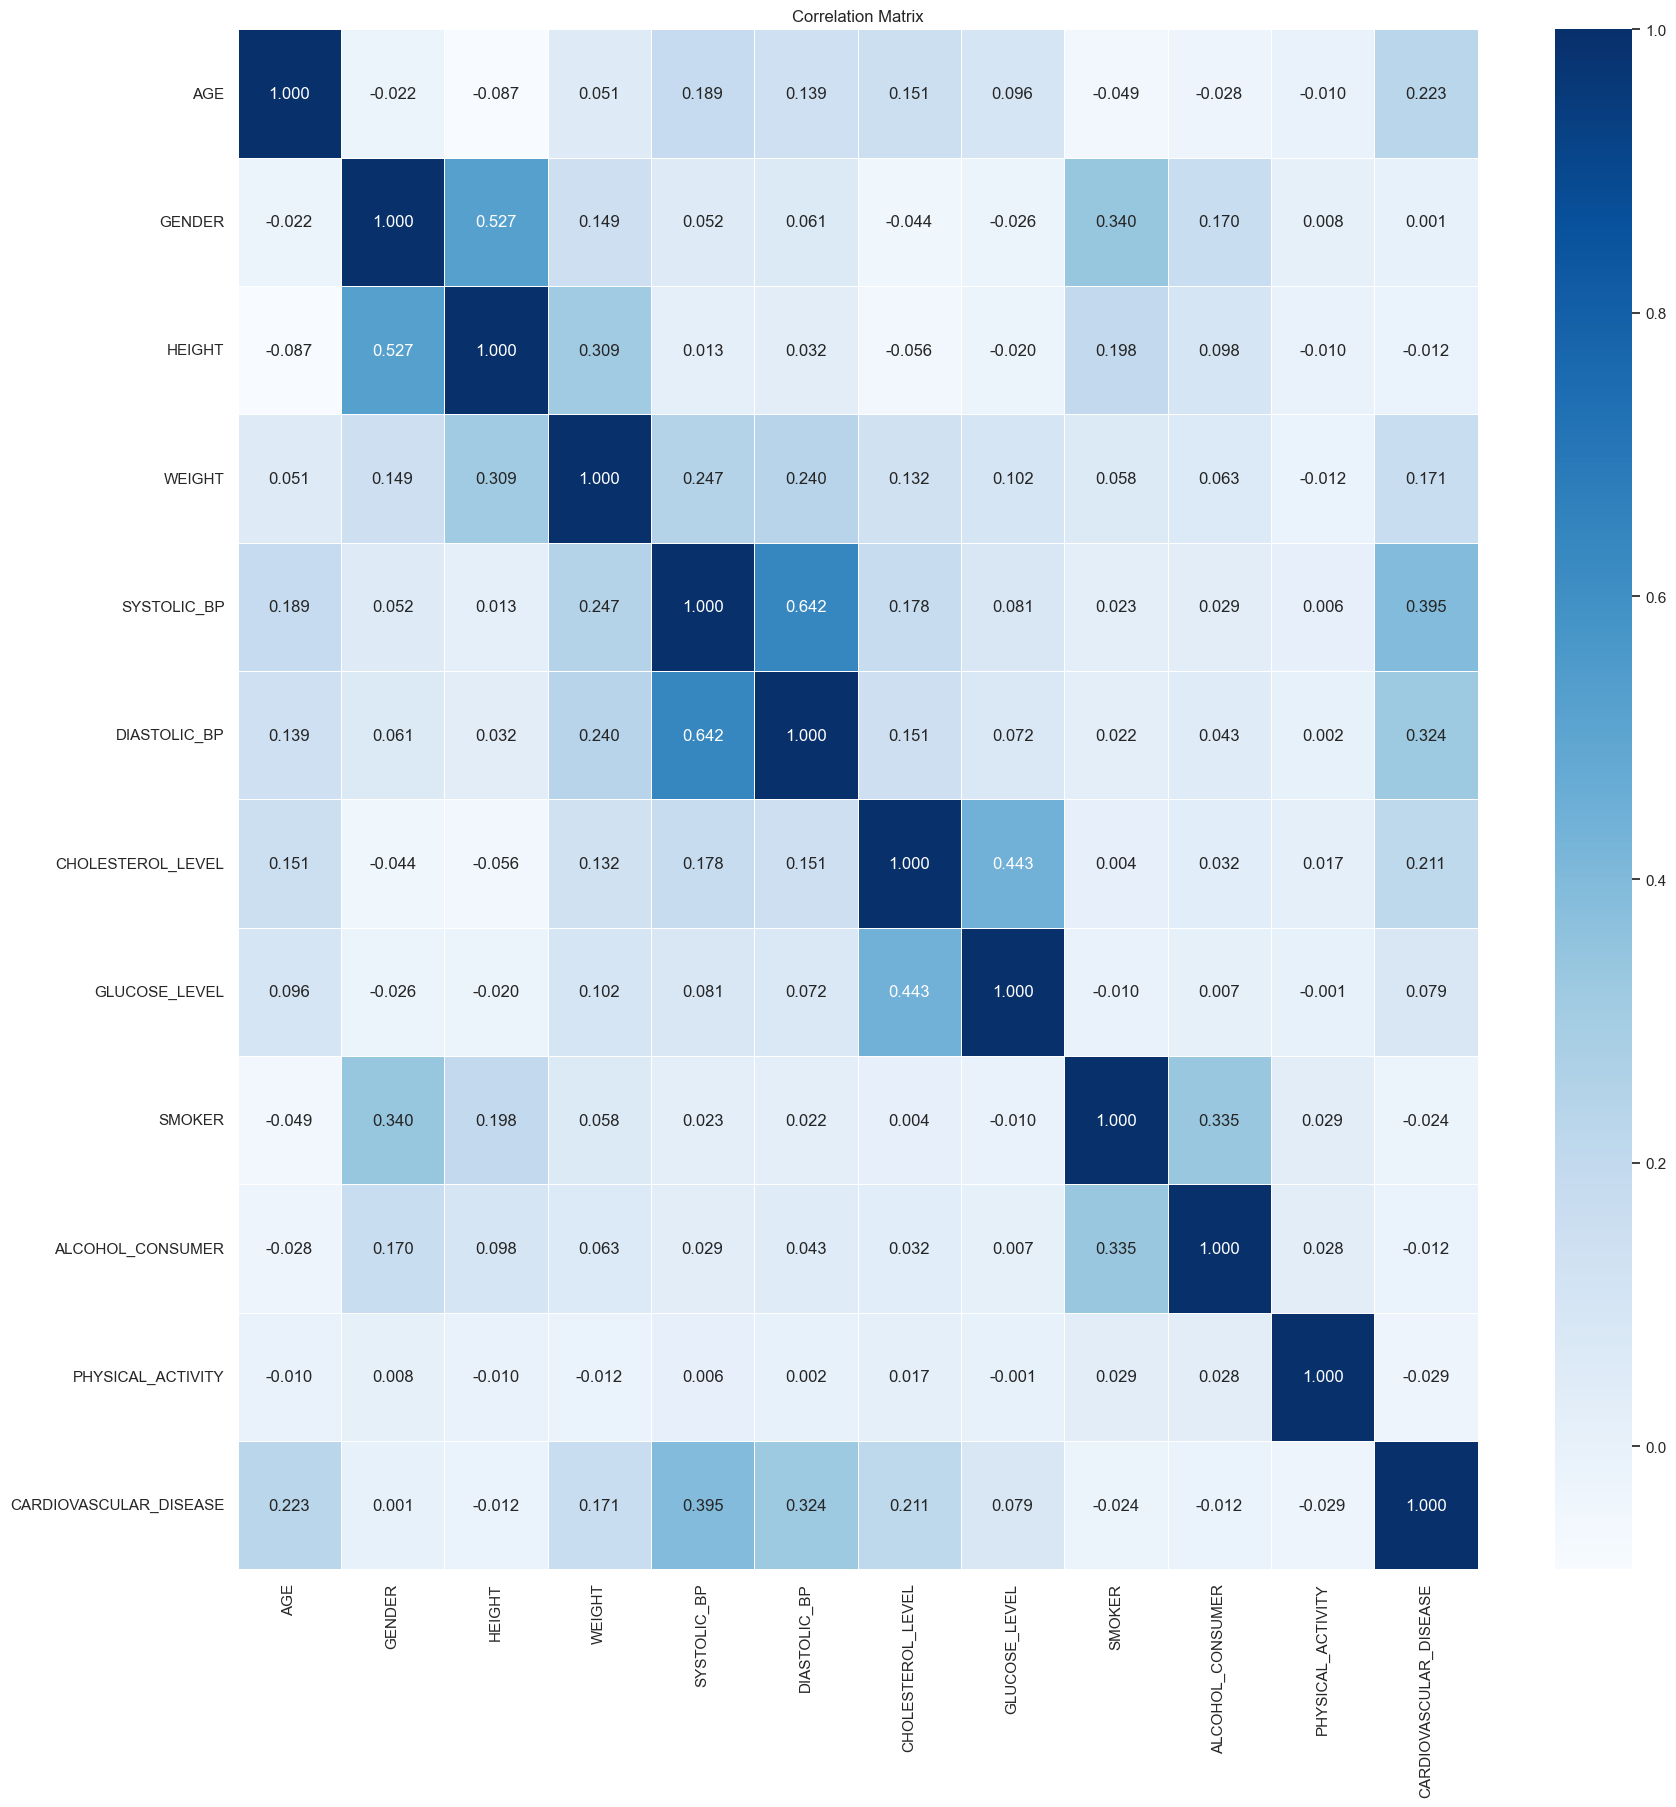

In [50]:
# Plotting the correlation matrix
corr = x.corr()

# Setting up the plot
f, ax = plt.subplots(figsize=(20, 20))

# Creating the heatmap
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, cmap="Blues", ax=ax)

# Adding the title
plt.title("Correlation Matrix")

# Saving the plot as a JPG file for reference
plt.savefig("correlation_matrix.jpg")

# Showing the plot
plt.show()


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : We can see from the Correlation map easily that Cholesterol level , blood pressure (systolic and diastolic both), Age, Weight and Glucose Level
have a powerful relationship with cardiovascular diseases..  </h1>

In [51]:
data_raw.dtypes # making sure all datatype are int

AGE                       int32
GENDER                    int64
HEIGHT                    int64
WEIGHT                    int64
SYSTOLIC_BP               int64
DIASTOLIC_BP              int64
CHOLESTEROL_LEVEL         int64
GLUCOSE_LEVEL             int64
SMOKER                    int64
ALCOHOL_CONSUMER          int64
PHYSICAL_ACTIVITY         int64
CARDIOVASCULAR_DISEASE    int64
dtype: object

In [52]:
X = data_raw.drop('CARDIOVASCULAR_DISEASE', axis=1) # input variales (11)
y = data_raw['CARDIOVASCULAR_DISEASE'] # target variablr (1)

## b. Using Decision Tree

In [53]:
# Creating and training the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Using function 'eature_importances' to get the important feature 
# This attribute contains the importance scores of each feature, indicating how much each feature contributes to the model's predictions.
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_})

# Displaying feature importances
print(feature_importances)

              feature  importance
0                 AGE    0.150209
1              GENDER    0.025374
2              HEIGHT    0.206817
3              WEIGHT    0.225119
4         SYSTOLIC_BP    0.232785
5        DIASTOLIC_BP    0.053018
6   CHOLESTEROL_LEVEL    0.037236
7       GLUCOSE_LEVEL    0.025955
8              SMOKER    0.012400
9    ALCOHOL_CONSUMER    0.010468
10  PHYSICAL_ACTIVITY    0.020618


## c. Using Chi Square Statistic

In [56]:
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Concatenating the  two dataframes for better visualization
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Attribute', 'Score']  # naming the dataframe columns


In [57]:
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
feature_scores # The'Score' column contains some measure of importance or relevance for each feature

,Attribute,Score
4,SYSTOLIC_BP,25505.735627
5,DIASTOLIC_BP,8310.500762
3,WEIGHT,5182.963003
0,AGE,2509.920083
6,CHOLESTEROL_LEVEL,981.527952
7,GLUCOSE_LEVEL,110.627607
8,SMOKER,32.708920
10,PHYSICAL_ACTIVITY,11.160946
9,ALCOHOL_CONSUMER,8.879119
2,HEIGHT,3.462008


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation: Based on the Correlation matrix, Decision Tree, and Chi-Square Statistic, it can be inferred that 'SYSTOLIC_BP', 'DIASTOLIC_BP', and 'WEIGHT' have the highest influence, while 'HEIGHT' and 'GENDER' seem to have the least influence on the target variable 'CARDIOVASCULAR_DISEASE'.</h1>


## Dropping the Irrelevant Variables based on Feature Selection & Feature Importance

In [58]:
variables_to_drop=['GENDER', 'HEIGHT', 'ALCOHOL_CONSUMER']
X.drop(variables_to_drop, axis=1, inplace=True)

In [59]:
variables_to_remove=['GENDER', 'HEIGHT', 'ALCOHOL_CONSUMER']
data_raw.drop(variables_to_remove, axis=1, inplace=True)

In [60]:
X.shape

(63828, 8)

# Understanding the data distribution in the most important selected variables
## a. Finding skewness of the dataset

In [61]:
# Listing of column names for analysis of the most essential variables
column_names = ['AGE', 'WEIGHT', 'SYSTOLIC_BP', 'DIASTOLIC_BP', 'CHOLESTEROL_LEVEL',
       'GLUCOSE_LEVEL', 'SMOKER', 'PHYSICAL_ACTIVITY', 'CARDIOVASCULAR_DISEASE']

for column_name in column_names:
    # Selecting the column for analysis
    data = data_raw[column_name]
    
    # Calculating the skewness
    skewness = data.skew()

    # Calculating the mean, median, and mode
    mean_value = data.mean()
    median_value = median(data)
    try:
        mode_value = mode(data)
    except StatisticsError:
        mode_value = "No unique mode"

    # Determining skewness direction
    skewness_direction = "Positively Skewed" if mean_value > median_value else "Negatively Skewed" if mean_value < median_value else "Normal Distribution"

    # Printing the results for the current column
    print(f"Column: {column_name}")
    print(f"Skewness: {skewness:.2f}")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Mode: {mode_value}")
    print(f"Skewness Direction: {skewness_direction}")
    print()

Column: AGE
Skewness: -0.27
Mean: 53.20
Median: 54.00
Mode: 55
Skewness Direction: Negatively Skewed

Column: WEIGHT
Skewness: 0.93
Mean: 74.51
Median: 72.00
Mode: 70
Skewness Direction: Positively Skewed

Column: SYSTOLIC_BP
Skewness: 0.08
Mean: 126.85
Median: 120.00
Mode: 120
Skewness Direction: Positively Skewed

Column: DIASTOLIC_BP
Skewness: 0.37
Mean: 81.53
Median: 80.00
Mode: 80
Skewness Direction: Positively Skewed

Column: CHOLESTEROL_LEVEL
Skewness: 1.51
Mean: 1.39
Median: 1.00
Mode: 1
Skewness Direction: Positively Skewed

Column: GLUCOSE_LEVEL
Skewness: 2.31
Mean: 1.24
Median: 1.00
Mode: 1
Skewness Direction: Positively Skewed

Column: SMOKER
Skewness: 2.84
Mean: 0.09
Median: 0.00
Mode: 0
Skewness Direction: Positively Skewed

Column: PHYSICAL_ACTIVITY
Skewness: -1.48
Mean: 0.80
Median: 1.00
Mode: 1
Skewness Direction: Negatively Skewed

Column: CARDIOVASCULAR_DISEASE
Skewness: -0.06
Mean: 0.51
Median: 1.00
Mode: 1
Skewness Direction: Negatively Skewed



<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : The skewness analysis highlights the key variables with positive skewness ('WEIGHT, 'SYSTOLIC_BP', 'DIASTOLIC_BP', 'CHOLESTEROL_LEVEL', 'GLUCOSE_LEVEL') indicating a right-tailed distribution, while 'PHYSICAL_ACTIVITY', 'CARDIOVASCULAR_DISEASE', 'AGE' displays negative skewness. Understanding skewness informs data distribution, guiding potential transformations for more accurate analyses.  </h1>

## b.Finding Kurtosis of the dataset

In [62]:
# Listing of column names for analysis of the most essential variables
column_names = ['AGE', 'WEIGHT', 'SYSTOLIC_BP', 'DIASTOLIC_BP', 'CHOLESTEROL_LEVEL',
       'GLUCOSE_LEVEL', 'PHYSICAL_ACTIVITY', 'CARDIOVASCULAR_DISEASE']

for column_name in column_names:
    # Selecting the column for analysis
    data = data_raw[column_name]
    
    # Calculating the kurtosis
    data_kurtosis = kurtosis(data)
    
    # Determining the kurtosis classification
    if data_kurtosis < 3:
        kurtosis_classification = "Fatter-than-normal distribution (platykurtic)"
    elif data_kurtosis > 3:
        kurtosis_classification = "Skinnier-than-normal distribution (leptokurtic)"
    else:
        kurtosis_classification = "Normal distribution"

    # Printing the results for the current column
    print(f"Column: {column_name}")
    print(f"Kurtosis: {data_kurtosis:.2f}")
    print(f"Kurtosis Classification: {kurtosis_classification}")
    print()


Column: AGE
Kurtosis: -0.85
Kurtosis Classification: Fatter-than-normal distribution (platykurtic)

Column: WEIGHT
Kurtosis: 2.02
Kurtosis Classification: Fatter-than-normal distribution (platykurtic)

Column: SYSTOLIC_BP
Kurtosis: 5.09
Kurtosis Classification: Skinnier-than-normal distribution (leptokurtic)

Column: DIASTOLIC_BP
Kurtosis: 5.64
Kurtosis Classification: Skinnier-than-normal distribution (leptokurtic)

Column: CHOLESTEROL_LEVEL
Kurtosis: 0.74
Kurtosis Classification: Fatter-than-normal distribution (platykurtic)

Column: GLUCOSE_LEVEL
Kurtosis: 3.85
Kurtosis Classification: Skinnier-than-normal distribution (leptokurtic)

Column: PHYSICAL_ACTIVITY
Kurtosis: 0.20
Kurtosis Classification: Fatter-than-normal distribution (platykurtic)

Column: CARDIOVASCULAR_DISEASE
Kurtosis: -2.00
Kurtosis Classification: Fatter-than-normal distribution (platykurtic)



<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : The kurtosis analysis highlights the shape of the distributions for essential variables. 'SYSTOLIC_BP', 'GLUCOSE_LEVEL', and 'DIASTOLIC_BP' exhibit leptokurtic distributions, indicating sharper peaks, skinnier-than-normal distribution and heavier tails. In contrast, 'AGE','WEIGHT,' 'CHOLESTEROL_LEVEL,', 'PHYSICAL_ACTIVITY,' and 'CARDIOVASCULAR_DISEASE' show platykurtic distributions with flatter peaks and lighter tails. Understanding kurtosis provides insights into the variability and tails of each variable's distribution.  </h1>

## Using Standard Scaler Normalization on Input data 

In [63]:
X.head(5) # seeing the first 5 rows of input variables before Z-score normalization

,AGE,WEIGHT,SYSTOLIC_BP,DIASTOLIC_BP,CHOLESTEROL_LEVEL,GLUCOSE_LEVEL,SMOKER,PHYSICAL_ACTIVITY
0,50,62,110,80,1,1,0,1
1,55,85,140,90,3,1,0,1
2,51,64,130,70,3,1,0,0
3,48,82,150,100,1,1,0,1
4,47,56,100,60,1,1,0,0


In [64]:
# Standardizing the entire input variable dataset 'X'
columns_to_normalize = ['AGE', 'WEIGHT', 'SYSTOLIC_BP', 'DIASTOLIC_BP', 'CHOLESTEROL_LEVEL', 'GLUCOSE_LEVEL', 'SMOKER', 'PHYSICAL_ACTIVITY']

# Performing Standard Scaling Transformation for the specified columns
scaler = StandardScaler()
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])

In [65]:
X.head(5) # Display the updated input variable with Standard Scaled values

,AGE,WEIGHT,SYSTOLIC_BP,DIASTOLIC_BP,CHOLESTEROL_LEVEL,GLUCOSE_LEVEL,SMOKER,PHYSICAL_ACTIVITY
0,-0.493129,-0.869643,-0.934286,-0.152709,-0.556726,-0.407565,-0.3172,0.503117
1,0.277973,0.728595,0.729117,0.842587,2.328169,-0.407565,-0.3172,0.503117
2,-0.338909,-0.730666,0.174649,-1.148005,2.328169,-0.407565,-0.3172,-1.987610
3,-0.801570,0.520129,1.283584,1.837883,-0.556726,-0.407565,-0.3172,0.503117
4,-0.955791,-1.286575,-1.488753,-2.143301,-0.556726,-0.407565,-0.3172,-1.987610


## Seperating Test Data Sample For Prediction

In [62]:
rows_for_prediction = data_raw.sample(n=10) # taking out 10 random rows for prediction

In [63]:
X = X.drop(rows_for_prediction.index)  # input variables stored in 'X'
y = y.drop(rows_for_prediction.index) # target variable stored in 'y'

In [64]:
X.columns # displaying the names of 8 input columns

Index(['AGE', 'WEIGHT', 'SYSTOLIC_BP', 'DIASTOLIC_BP', 'CHOLESTEROL_LEVEL',
       'GLUCOSE_LEVEL', 'SMOKER', 'PHYSICAL_ACTIVITY'],
      dtype='object')

In [65]:
X.shape, y.shape, data_raw.shape # print the shape of dataframes

((63818, 8), (63818,), (63828, 9))

<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation: We took 10 rows for our prediction part and stored it in dataframe 'rows_for_prediction'. Initially, the size of (X) input data was (63828,8) and now it's (63818,8) that will be used for model training and testing part and the 10 rows of target variable (y) prediction part will be used as actual output to compare with our predicted output.</h1>

<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section VII: Model Development

## Model Train-Test & Evaluation

In [67]:
# Splitting the dataset into training and testing sets. 60% of the data is used for training (X_train, y_train).
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) 

# Out of the remaining 40 % of the data, 20% of the data is used for validation (X_val, y_val) and the other 20% of the data is used for testing (X_test, y_test).
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) 


<h1 align="left"  style=" color:#000; background-color:#ADD8E6; padding:10px;">Model 1. Logistic Regression


Evaluation metrics for Logistic Regression:
Accuracy: 0.7251
Precision: 0.7530
Recall: 0.6945
F1-Score: 0.7225
Cohen's Kappa: 0.4511
Log Loss: 0.5702


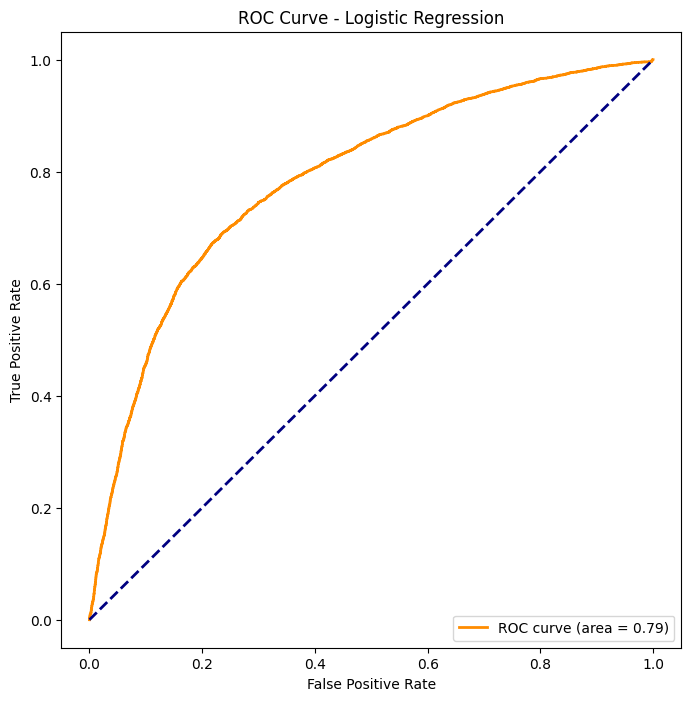

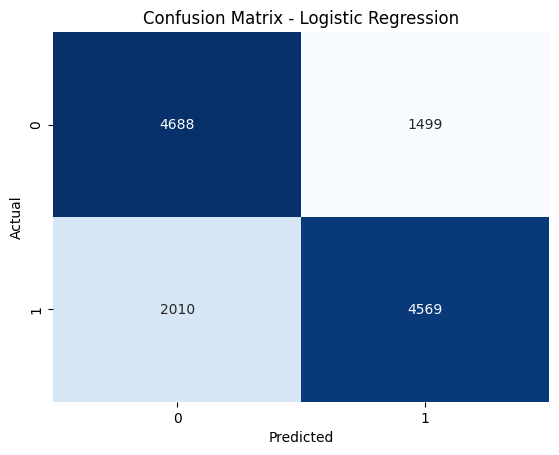

In [63]:
# Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)


# We defined a Function to plot the ROC curve
def plot_roc_curve(y_true, y_probs, classifier_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {classifier_name}')
    plt.legend(loc='lower right')
    plt.show()

# Looping through the classifier
classifiers = [
    ('Logistic Regression', logreg)]

for classifier_name, classifier in classifiers:
    print(f"\nEvaluation metrics for {classifier_name}:\n{'='*40}")

    # Making predictions
    y_pred = classifier.predict(X_val)
    y_probs = classifier.predict_proba(X_val)[:, 1]

    # Finding the Accuracy score
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Finding the Precision score
    precision = precision_score(y_val, y_pred)
    print(f"Precision: {precision:.4f}")

    # Finding the Recall score
    recall = recall_score(y_val, y_pred)
    print(f"Recall: {recall:.4f}")

    # Finding the F1-score
    f1 = f1_score(y_val, y_pred)
    print(f"F1-Score: {f1:.4f}")

    # Finding the Cohen's Kappa score
    kappa = cohen_kappa_score(y_val, y_pred)
    print(f"Cohen's Kappa: {kappa:.4f}")

    # Finding the Log Loss
    logloss = log_loss(y_val, y_probs)
    print(f"Log Loss: {logloss:.4f}")

    # ROC Curve and AUC plot
    plot_roc_curve(y_val, y_probs, classifier_name)

    # Confusion Matrix plot
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [67]:
dump(logreg, 'logistic_regression_model.pkl') # We used dump function to save the ML model to a file with pkl format
print("Model exported successfully!")

Model exported successfully!


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : 
The Logistic Regression model demonstrates reasonable performance with an accuracy of 72.51%. Precision, Recall, and F1-Score indicate balanced classification, while Cohen's Kappa reflects moderate agreement. The Log Loss of 0.570 suggests a moderate level of uncertainty in the model's probability predictionss. The ROC curve has an Area Under Curve of 0.79, suggesting that
the model is moderately good at predicting correctlt..  </h1>

<h1 align="left"  style=" color:#000; background-color:#ADD8E6; padding:10px;">Model 2. Decision Tree Classifier

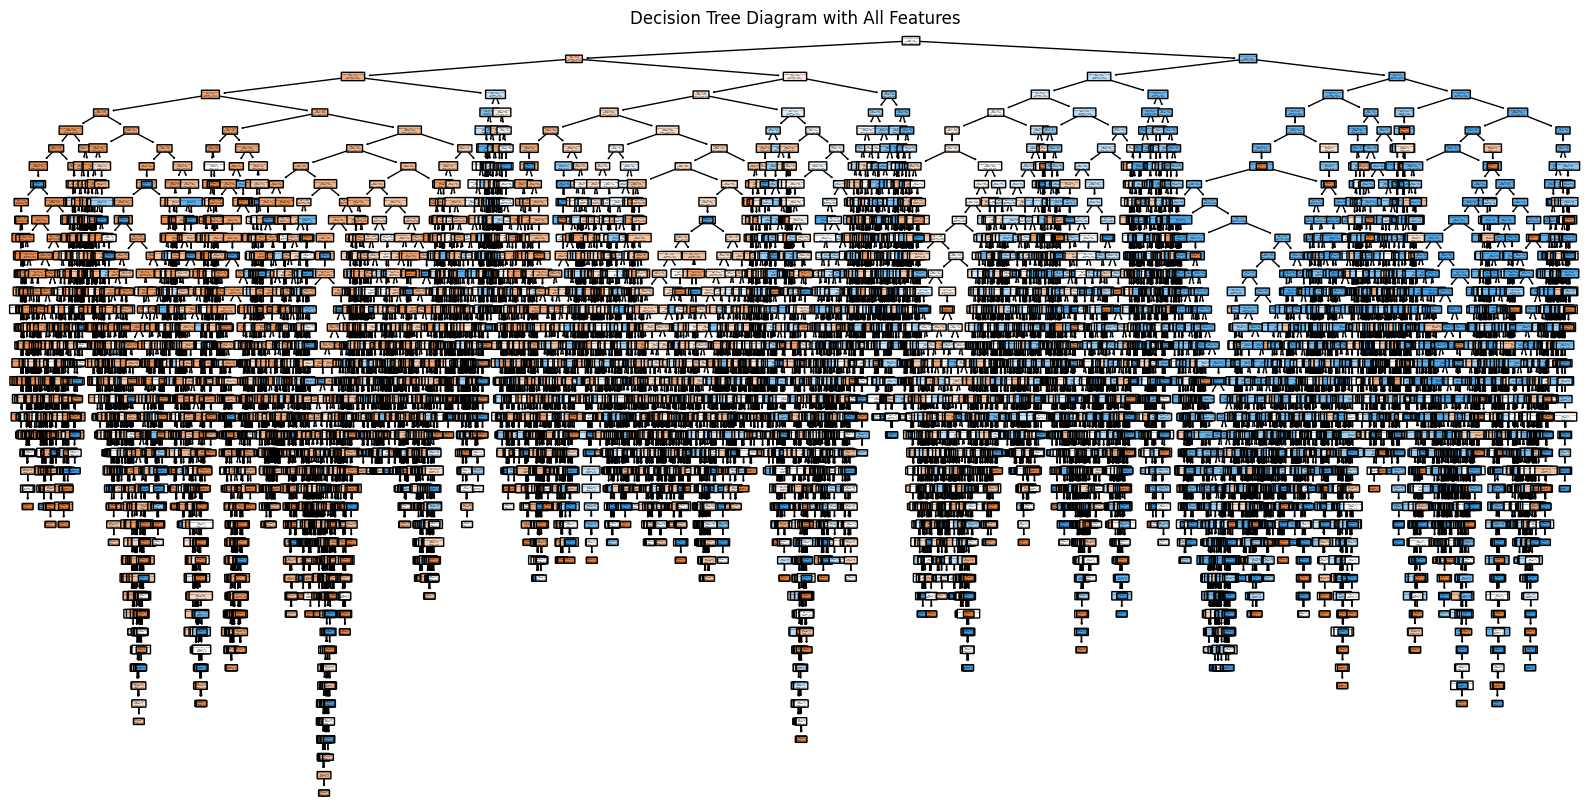

Accuracy: 0.6414
Precision: 0.6717
Recall: 0.5949
F1-Score: 0.6310
Cohen's Kappa: 0.2847
Log Loss: 9.8178


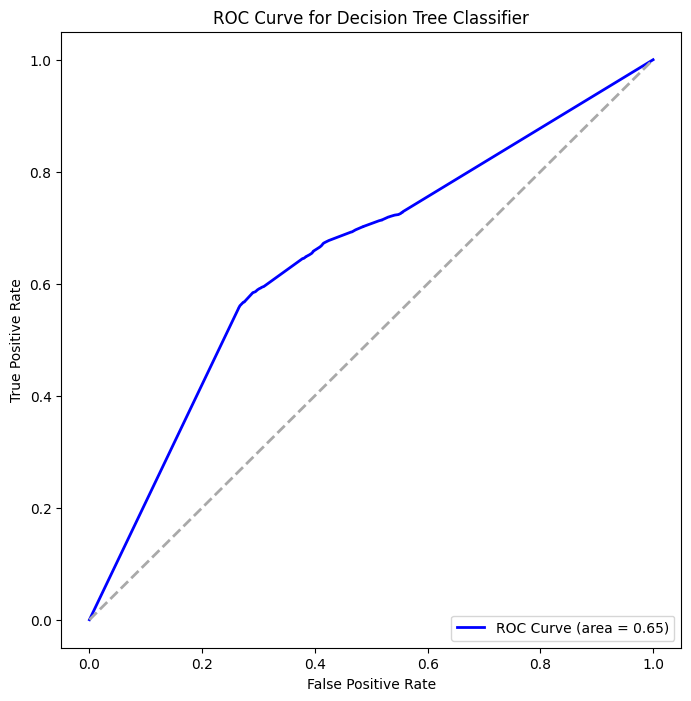

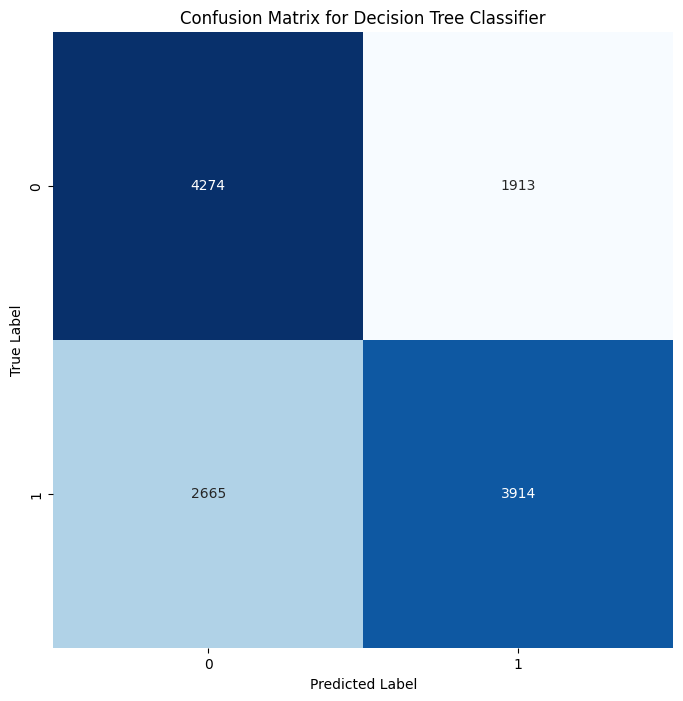

In [61]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, log_loss, roc_curve, auc, confusion_matrix

# Training the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title('Decision Tree Diagram with All Features')
plt.show()

# Making predictions using the validation set
y_pred_val = dt_classifier.predict(X_val)
y_probs_val = dt_classifier.predict_proba(X_val)[:, 1]  # Probabilities for positive class

# Calculating evaluation metrics
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
kappa_val = cohen_kappa_score(y_val, y_pred_val)
logloss_val = log_loss(y_val, y_probs_val)  # Log loss for validation set

# Displaying the metrics
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1-Score: {f1_val:.4f}")
print(f"Cohen's Kappa: {kappa_val:.4f}")
print(f"Log Loss: {logloss_val:.4f}")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_probs_val)  
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_val)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [68]:
dump(dt_classifier, 'decision_tree_model.pkl') # We used dump function to save the ML model to a file with pkl format
print("Model exported successfully!")

Model exported successfully!


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : We can see the Decision Tree Diagram with all the 8 features. The Decision Tree model exhibits moderate performance with an accuracy of 64.14%. While Precision and Recall indicate a balanced classification approach, the F1-Score reflects a harmonic mean between precision and recall.The ROC AUC is 0.65 and the Cohen's Kappa value of 0.2847 suggests fair agreement, and the relatively high Log Loss of 9.8178 implies a notable level of uncertainty in the model's probability predictions. There is more room for
improvement.  </h1>

<h1 align="left"  style=" color:#000; background-color:#ADD8E6; padding:10px;">Model 3. Support Vector Machine (SVM)

Number of support vectors: 22845

Evaluation metrics for SVM:
Accuracy: 0.7316
Precision: 0.7660
Recall: 0.6901
F1-Score: 0.7261
Cohen's Kappa: 0.4644
Log Loss: 0.5577


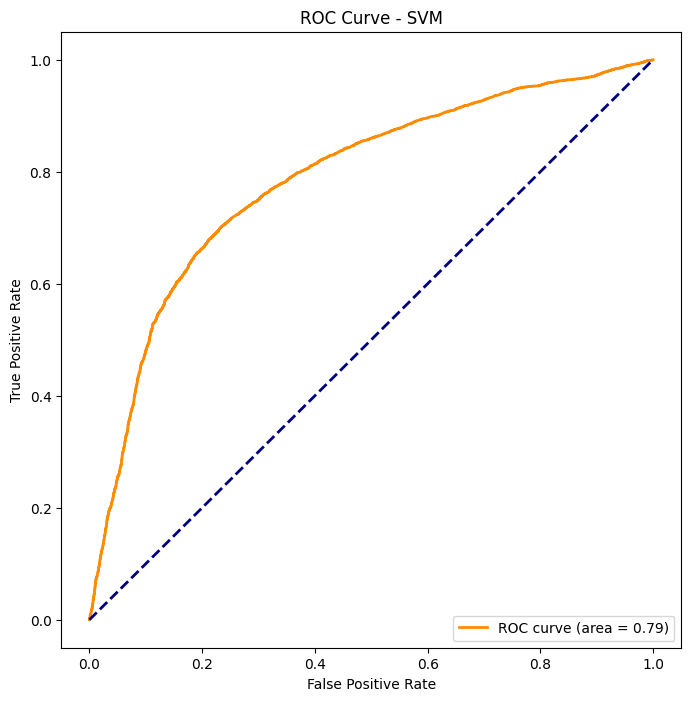

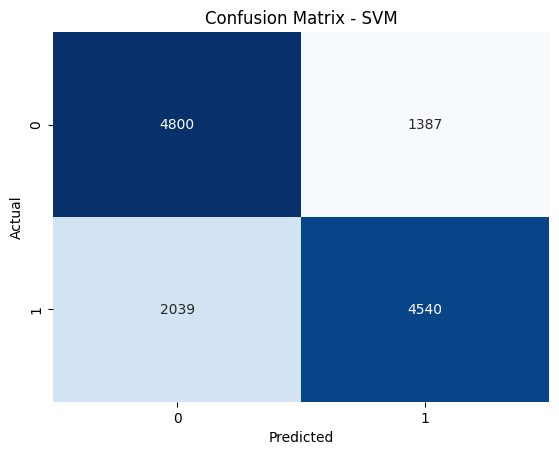

In [64]:
# Support Vector Machine (SVM) model
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_val)
num_support_vectors = svm_classifier.support_vectors_.shape[0]
print(f"Number of support vectors: {num_support_vectors}")

# We used a function to plot ROC curve
def plot_roc_curve(y_true, y_probs, classifier_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {classifier_name}')
    plt.legend(loc='lower right')
    plt.show()

# Looping through the SVM classifier
classifiers = [
    ('SVM', svm_classifier)
]

for classifier_name, classifier in classifiers:
    print(f"\nEvaluation metrics for {classifier_name}:\n{'='*40}")

    # Makeing predictions
    y_pred = classifier.predict(X_val)
    y_probs = classifier.predict_proba(X_val)[:, 1]

    # Finding the Accuracy Score
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Finding the Precision Score
    precision = precision_score(y_val, y_pred)
    print(f"Precision: {precision:.4f}")

    # Finding the Recall Score
    recall = recall_score(y_val, y_pred)
    print(f"Recall: {recall:.4f}")

    # Finding the F1-Score Score
    f1 = f1_score(y_val, y_pred)
    print(f"F1-Score: {f1:.4f}")

    # Finding the Cohen's Kappa Score
    kappa = cohen_kappa_score(y_val, y_pred)
    print(f"Cohen's Kappa: {kappa:.4f}")

    # Finding the Log Loss
    logloss = log_loss(y_val, y_probs)
    print(f"Log Loss: {logloss:.4f}")

    # ROC Curve and AUC plot
    plot_roc_curve(y_val, y_probs, classifier_name)

    # Confusion Matrix plot
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [69]:
dump(svm_classifier, 'svm_classifier.joblib')  # We used dump function to save the ML model to a file with pkl format
print("Model exported successfully!")

Model exported successfully!


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : The Support Vector Machine (SVM) model demonstrates solid performance with an accuracy of 73.16%. Precision, Recall, and F1-Score indicate a well-balanced classification approach, while the Cohen's Kappa value of 0.4644 suggests moderate agreement. The Log Loss of 0.5577 and an ROC of 0.79 further underscore the model's effectiveness in probabilistic predictions, with a lower Log Loss indicating improved probability estimation. The SVM
model showcases better performance when compared to the 2 previous models.  </h1>

<h1 align="left"  style=" color:#000; background-color:#ADD8E6; padding:10px;">Model 4. K-Nearest Neighbors (KNN)

Accuracy for k = 2 is: 0.6312078959736801
Accuracy for k = 3 is: 0.6695911013629955
Accuracy for k = 4 is: 0.6745260849130503
Accuracy for k = 5 is: 0.690349365502115
Accuracy for k = 6 is: 0.691211029296569
Accuracy for k = 7 is: 0.6938743537521541
Accuracy for k = 8 is: 0.6978693404355318
Accuracy for k = 9 is: 0.7017859940466865
Accuracy for k = 10 is: 0.7060943130189566
Accuracy for k = 11 is: 0.7083659721134263
Accuracy for k = 12 is: 0.7093059689801035
Accuracy for k = 13 is: 0.7124392918690271
Accuracy for k = 14 is: 0.7145542848190506
Accuracy for k = 15 is: 0.7146326178912737
Accuracy for k = 16 is: 0.7153376155412815
Accuracy for k = 17 is: 0.7160426131912894
Accuracy for k = 18 is: 0.7169826100579665
Accuracy for k = 19 is: 0.7182359392135359
Accuracy for k = 20 is: 0.7175309415635281
Accuracy for k = 21 is: 0.7176876077079744
Accuracy for k = 22 is: 0.7193326022246592
Accuracy for k = 23 is: 0.7193326022246592
Accuracy for k = 24 is: 0.7203509321635595
Accuracy for k = 25 i

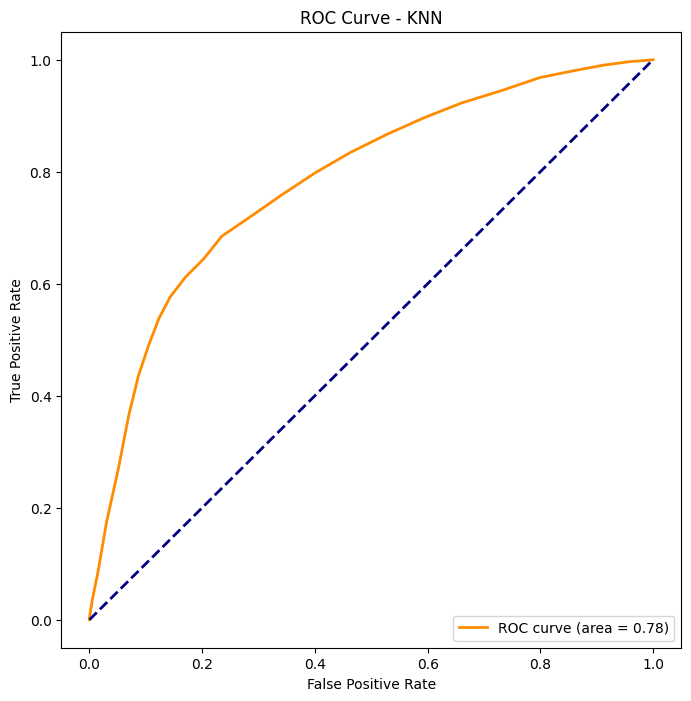

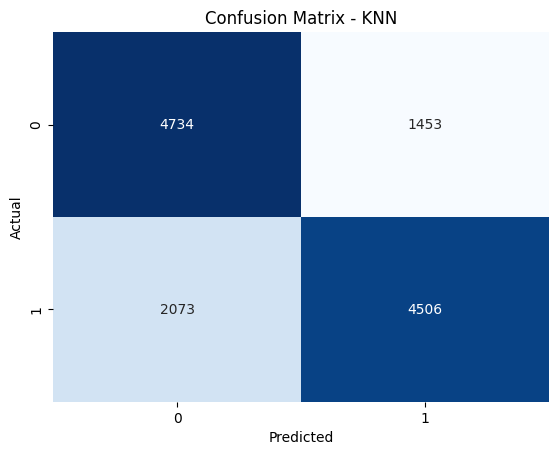

In [65]:
# Find the best value for k
best_k = None
best_accuracy = 0

for k in range(2, 30):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_preds = classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_preds)

    print(f"Accuracy for k = {k} is: {accuracy}")

    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f"Best k: {best_k}")
print(f"Best accuracy: {best_accuracy}")

# K-Nearest Neighbors (KNN) with the best value of k
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, y_train)
y_pred_knn = best_knn_classifier.predict(X_val)

# We used a function to plot the ROC curve
def plot_roc_curve(y_true, y_probs, classifier_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {classifier_name}')
    plt.legend(loc='lower right')
    plt.show()

# Looping through the KNN classifier
classifiers = [
    ('KNN', best_knn_classifier)
]

for classifier_name, classifier in classifiers:
    print(f"\nEvaluation metrics for {classifier_name}:\n{'='*40}")

    # Make predictions
    y_pred = classifier.predict(X_val)
    y_probs = classifier.predict_proba(X_val)[:, 1]

    # Finding the Accuracy Score
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Finding the Precision Score
    precision = precision_score(y_val, y_pred, average='weighted')
    print(f"Precision: {precision:.4f}")

    # Finding the Recall Score
    recall = recall_score(y_val, y_pred, average='weighted')
    print(f"Recall: {recall:.4f}")

    # Finding the F1-Score Score
    f1 = f1_score(y_val, y_pred, average='weighted')
    print(f"F1-Score: {f1:.4f}")

    # Finding the Cohen's Kappa Score
    kappa = cohen_kappa_score(y_val, y_pred)
    print(f"Cohen's Kappa: {kappa:.4f}")

    # Finding the Log Loss
    logloss = log_loss(y_val, y_probs)
    print(f"Log Loss: {logloss:.4f}")

    # ROC Curve and AUC plot
    plot_roc_curve(y_val, y_probs, classifier_name)

    # Confusion Matrix plot
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [70]:
dump(best_knn_classifier, 'knn_classifier.joblib')  # We used dump function to save the ML model to a file with pkl format
print("Model exported successfully!")

Model exported successfully!


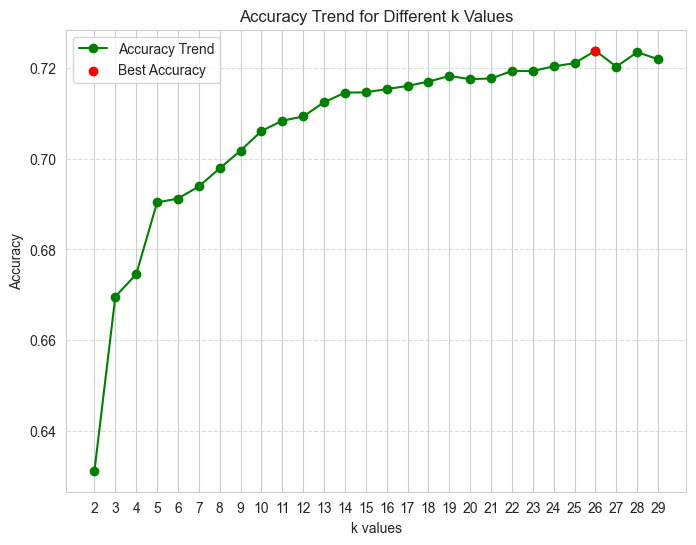

In [73]:
sns.set_palette("Greens")

k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

accuracies = [0.6312078959736801, 0.6695911013629955, 0.6745260849130503, 0.690349365502115, 0.691211029296569, 0.6938743537521541,
              0.6978693404355318, 0.7017859940466865, 0.7060943130189566, 0.7083659721134263, 0.7093059689801035, 0.7124392918690271, 
              0.7145542848190506, 0.7146326178912737, 0.7153376155412815, 0.7160426131912894, 0.7169826100579665, 0.7182359392135359,
              0.7175309415635281, 0.7176876077079744, 0.7193326022246592, 0.7193326022246592, 0.7203509321635595, 0.7210559298135673,
              0.7237975873413756, 0.7202725990913363, 0.7234842550524831, 0.7219175936080213]
plt.figure(figsize=(8, 6))  

# Plotting the line chart
plt.plot(k_values, accuracies, marker='o', color='green', label='Accuracy Trend')

# Finding the index of the best accuracy
best_accuracy_index = accuracies.index(max(accuracies))

# Highlighting the point with the best accuracy (red colour)
plt.scatter(k_values[best_accuracy_index], max(accuracies), color='red', label='Best Accuracy', zorder=5)

plt.title('Accuracy Trend for Different k Values')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : The K-Nearest Neighbors (KNN) model achieves its best_k accuracy at k=26 as seen in above line chart with 72.38%. Precision, Recall, and F1-Score reflect a balanced classification approach, while Cohen's Kappa of 0.4487 suggests fair agreement. The Log Loss of 0.5908 and an ROC of 0.78 indicate a moderate level of uncertainty in probability predictions, showcasing the overall effectiveness of the KNN model in the classification task.

<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section VIII: Model Evaluation

In [66]:
# Looping through the all 4 classifiers
classifiers = [
    ('Logistic Regression', logreg),
    ('Decision Tree Classifier', dt_classifier),
    ('SVM', svm_classifier),
    ('KNN', best_knn_classifier)
]

scores = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": [], "Cohen's Kappa": [], "Log Loss": []} # 6 metrices

for i, (model_name, model) in enumerate(classifiers, start=1):
    # Making predictions on the validation set for evaluation
    y_pred_val = model.predict(X_val)
    y_probs_val = model.predict_proba(X_val)[:, 1]

    # Calculating the evaluation metrics on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val)
    recall_val = recall_score(y_val, y_pred_val)
    f1_val = f1_score(y_val, y_pred_val)
    kappa_val = cohen_kappa_score(y_val, y_pred_val)
    logloss_val = log_loss(y_val, y_probs_val)

    # Adding the results to the scores dictionary
    scores["Model"].append(model_name)
    scores["Accuracy"].append(round(accuracy_val, 4))
    scores["Precision"].append(round(precision_val, 4))
    scores["Recall"].append(round(recall_val, 4))
    scores["F1-Score"].append(round(f1_val, 4))
    scores["Cohen's Kappa"].append(round(kappa_val, 4))
    scores["Log Loss"].append(round(logloss_val, 4))

# Creating a DataFrame to display the results
scores_frame = pd.DataFrame(scores).sort_values(by=["Accuracy"], axis=0, ascending=False)
scores_frame.index = range(1, len(scores_frame) + 1)  # Reindex with serial numbers
scores_frame.style.applymap(lambda x: 'font-weight: bold', subset=['Model']).format("{:.4f}", subset=scores_frame.columns[1:])
print(scores_frame)

                      Model  Accuracy  Precision  Recall  F1-Score  \
1                       SVM    0.7316     0.7660  0.6901    0.7261   
2       Logistic Regression    0.7251     0.7530  0.6945    0.7225   
3                       KNN    0.7238     0.7562  0.6849    0.7188   
4  Decision Tree Classifier    0.6414     0.6717  0.5949    0.6310   

   Cohen's Kappa  Log Loss  
1         0.4644    0.5577  
2         0.4511    0.5702  
3         0.4487    0.5908  
4         0.2847    9.8178  


C:\Users\arjun\AppData\Local\Temp\ipykernel_19332\1994270817.py:38: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  scores_frame.style.applymap(lambda x: 'font-weight: bold', subset=['Model']).format("{:.4f}", subset=scores_frame.columns[1:])


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : The SVM model leads in performance with the highest accuracy (73.16%), precision, recall, and F1-Score among the classifiers, yielding a Cohen's Kappa of 0.4644 and a low Log Loss of 0.5577. Logistic Regression and KNN closely follow, while the Decision Tree Classifier exhibits lower accuracy and F1-Score, suggesting limitations in its suitability for this task.  </h1>

## Visualization of the result for the evaluation metrics

C:\Users\arjun\AppData\Local\Temp\ipykernel_19332\3291412814.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(sorted_models, rotation=45)
C:\Users\arjun\AppData\Local\Temp\ipykernel_19332\3291412814.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(models, rotation=45)
C:\Users\arjun\AppData\Local\Temp\ipykernel_19332\3291412814.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(models, rotation=45)
C:\Users\arjun\AppData\Local\Temp\ipykernel_19332\3291412814.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(models, rotation=45)
C:\Users\

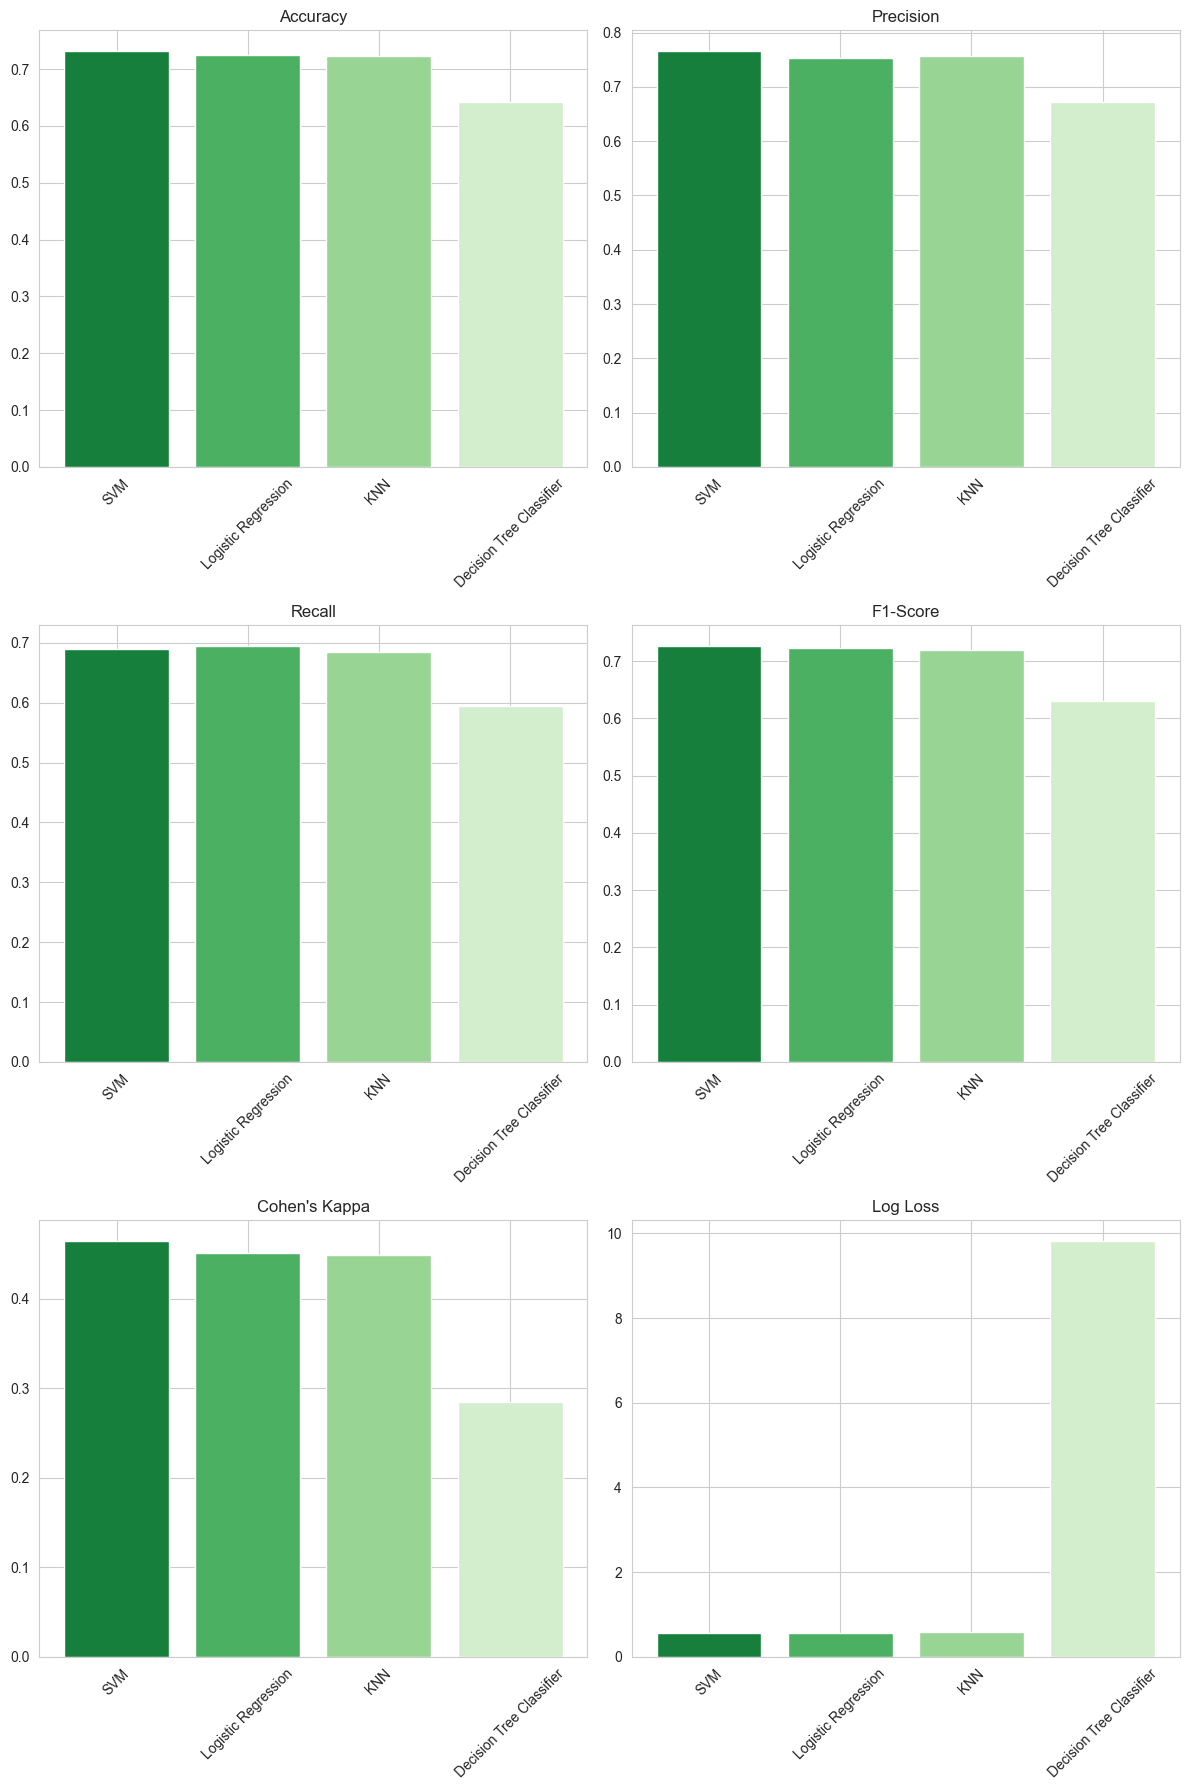

In [71]:
sns.set_style("whitegrid")

# evaluation metrics
models = scores_frame['Model']
accuracy = scores_frame['Accuracy']
precision = scores_frame['Precision']
recall = scores_frame['Recall']
f1_score = scores_frame['F1-Score']
cohen_kappa = scores_frame["Cohen's Kappa"]
log_loss_values = scores_frame['Log Loss']

# We sorted the models based on accuracy in reverse order
sorted_models = [model for _, model in sorted(zip(accuracy, models), reverse=True)]
sorted_accuracy = sorted(accuracy, reverse=True)
color_palette = sns.color_palette("Greens_r", len(models)) 

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

# Creating Bar Chart for Accuracy
axes[0, 0].bar(sorted_models, sorted_accuracy, color=[color_palette[sorted_models.index(model)] for model in sorted_models])
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_xticklabels(sorted_models, rotation=45)

# Creating Bar Chart for Precision
axes[0, 1].bar(models, precision, color=sns.color_palette("Greens_r", len(models)))  # Use "_r" for reversed shades
axes[0, 1].set_title('Precision')
axes[0, 1].set_xticklabels(models, rotation=45)

# Creating Bar Chart for Recall
axes[1, 0].bar(models, recall, color=sns.color_palette("Greens_r", len(models)))  # Use "_r" for reversed shades
axes[1, 0].set_title('Recall')
axes[1, 0].set_xticklabels(models, rotation=45)

# Creating Bar Chart for F1-Score
axes[1, 1].bar(models, f1_score, color=sns.color_palette("Greens_r", len(models)))  # Use "_r" for reversed shades
axes[1, 1].set_title('F1-Score')
axes[1, 1].set_xticklabels(models, rotation=45)

# Creating Bar Chart for Cohen Kappa
axes[2, 0].bar(models, cohen_kappa, color=sns.color_palette("Greens_r", len(models)))  # Use "_r" for reversed shades
axes[2, 0].set_title("Cohen's Kappa")
axes[2, 0].set_xticklabels(models, rotation=45)

# Creating Bar Chart for Log Loss
axes[2, 1].bar(models, log_loss_values, color=sns.color_palette("Greens_r", len(models)))  # Use "_r" for reversed shades
axes[2, 1].set_title('Log Loss')
axes[2, 1].set_xticklabels(models, rotation=45)

# Adjusting the layout
plt.tight_layout()

# Showing all the 6 plots
plt.show()


<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">MAKING PREDICTION ON UNSEEN DATA FOR CARDIOVASCULAR DISEASE PREDICTION

C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Index: 47568, Actual Class: Possibility of Cardiovascular Disease, Predicted Class: Possibility of Cardiovascular Disease
Index: 13751, Actual Class: Absence of Cardiovascular Disease, Predicted Class: Absence of Cardiovascular Disease
Index: 32211, Actual Class: Possibility of Cardiovascular Disease, Predicted Class: Possibility of Cardiovascular Disease
Index: 18353, Actual Class: Possibility of Cardiovascular Disease, Predicted Class: Possibility of Cardiovascular Disease
Index: 27824, Actual Class: Absence of Cardiovascular Disease, Predicted Class: Absence of Cardiovascular Disease
Index: 12301, Actual Class: Possibility of Cardiovascular Disease, Predicted Class: Absence of Cardiovascular Disease
Index: 9048, Actual Class: Absence of Cardiovascular Disease, Predicted Class: Absence of Cardiovascular Disease
Index: 54962, Actual Class: Absence of Cardiovascular Disease, Predicted Class: Absence of Cardiovascular Disease
Index: 29042, Actual Class: Absence of Cardiovascular Disease

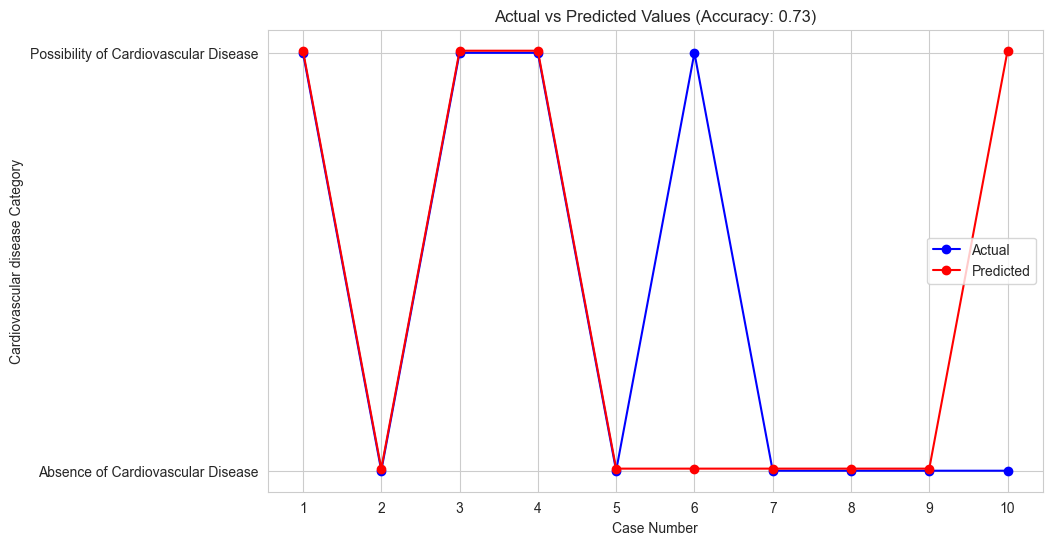

In [72]:
loaded_model = joblib.load('svm_classifier.joblib')

# Creating a DataFrame from X_train
X_train_df = pd.DataFrame(X_train, columns=['AGE', 'WEIGHT', 'SYSTOLIC_BP', 'DIASTOLIC_BP', 'CHOLESTEROL_LEVEL',
       'GLUCOSE_LEVEL', 'SMOKER', 'PHYSICAL_ACTIVITY'])

# Here y_train is your target variable array
rows_for_prediction = X_train_df.copy()
rows_for_prediction['CARDIOVASCULAR_DISEASE'] = y_train

# Dropping the rows with missing values
rows_for_prediction = rows_for_prediction.dropna()

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rows_for_prediction.drop('CARDIOVASCULAR_DISEASE', axis=1))

# Making predictions on the scaled data
rows_for_prediction['PREDICTED_CARDIOVASCULAR_DISEASE_CATEGORY'] = loaded_model.predict(X_scaled)
rows_for_prediction['PREDICTED_CARDIOVASCULAR_DISEASE_CATEGORY'] = rows_for_prediction['PREDICTED_CARDIOVASCULAR_DISEASE_CATEGORY'].round().astype(int)

# Defining the class labels
class_labels = {
    0: 'Absence of Cardiovascular Disease',
    1: 'Possibility of Cardiovascular Disease',
}

# Printing the first 10 predictions
for index, row in rows_for_prediction.head(10).iterrows():
    actual_class = class_labels[row['CARDIOVASCULAR_DISEASE']]
    predicted_class = class_labels[row['PREDICTED_CARDIOVASCULAR_DISEASE_CATEGORY']]
    print(f"Index: {index}, Actual Class: {actual_class}, Predicted Class: {predicted_class}")

# Calculating the accuracy
accuracy = accuracy_score(rows_for_prediction['CARDIOVASCULAR_DISEASE'], rows_for_prediction['PREDICTED_CARDIOVASCULAR_DISEASE_CATEGORY'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), rows_for_prediction.head(10)['CARDIOVASCULAR_DISEASE'], marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(range(1, 11), rows_for_prediction.head(10)['PREDICTED_CARDIOVASCULAR_DISEASE_CATEGORY'] + 0.005, marker='o', linestyle='-', color='red', label='Predicted')
plt.title(f'Actual vs Predicted Values (Accuracy: {accuracy:.2f})')
plt.xlabel('Case Number')
plt.ylabel('Cardiovascular disease Category')
plt.xticks(range(1, 11))
plt.yticks(list(class_labels.keys()), list(class_labels.values()))
plt.legend()
plt.show()


<h1 align="left" style="color:#000; background-color:#90EE90; padding:10px;">Prediction Interpretations</h1>

### Based on the line chart visualization we can clearly see that the model can classify 8/10 cases correctly and it can predict the possibility or Absence of Cardiovascular Disease with an accuracy of 73%.

<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Conclusion

### After conducting our analysis, we achieved a 73.16 % accuracy in predicting the presence or absence of cardiovascular disease using only data collected from patients during examination. Our findings indicate that variables like Gender and height of a person are not robust predictors of cardiovascular disease, although they offer some insight into cardiovascular disease that patients may have.

### For our data, the Support Vector Machine offered us the best prediction result. The decision tree classifier was the least successful model in classifying the presence or absence of cardiovascular disease. We have also tried our hand on the Back-Propagation model that gave us a similar accuracy of 73%.

<h1 align="left" style="color:#000; background-color:#90EE90; padding:10px;">Scope for Further Analysis</h1>

### While our models have shown promise by predicting the presence or the absence of cardiovascular disease with an accuracy of 73%, there's room for improvement. To boost our model metrics, we recommend expanding our dataset to include a minimum of 1 Million rows of trustable unbiased source of patient data from different geographical locations, considering the impact on the health of every individual. Exploring additional relevant features such as genetic markers, lifestyle factors, or medical history could provide valuable insights for refining the models, potentially leading to more precise cardiovascular disease prediction.